In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()




In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)


In [4]:
import scipy.stats as st
from statsmodels.formula.api import ols

In [5]:
plt.rcParams['figure.figsize']=[15,10]

In [6]:
# load the data set

In [7]:
df=pd.read_excel("Insurance_Claims_Data.xlsx")
df.head()

,Uniquekey,Txt_Policy_Year,Boo_Endorsement,Txt_Location_RTA,Txt_Policy_Code,Txt_Class_Code,Txt_Zone_Code,Num_Vehicle_Age,Txt_CC_PCC_GVW_Code,Txt_Colour_Vehicle,Num_IDV,Txt_Permit_Code,Txt_Nature_Goods_Code,Txt_Road_Type_Code,Txt_Vehicle_Driven_By_Code,Txt_Driver_Exp_Code,Txt_Claims_History_Code,Txt_Driver_Qualification_Code,Txt_Incurred_Claims_Code,Boo_TPPD_Statutory_Cover_only,Txt_Claim_Year,Date_Accident_Loss,Txt_Place_Accident,Date_Claim_Intimation,Txt_TAC_NOL_Code,Date_Disbursement,Boo_OD_Total_Loss,DRV_CLAIM_AMT,DRV_CLAIM_STATUS,Boo_AntiTheft,Boo_NCB,Num_Net_OD_Premium
0,20745,2011-12,0,GOA,2,11,36,7,50,OTHER COLOR,104000.0,1,2,3,1,6,4,2,2,0,2012-13,2011-10-14,GOA,2011-10-15,59,NaT,0,0.0,REJECTED,0,0,5088
1,20752,2011-12,0,AKOLA,2,11,36,7,50,OTHER COLOR,88000.0,1,2,3,1,6,2,1,5,0,2012-13,2011-10-08,AKOLA,2011-10-14,59,NaT,0,0.0,REJECTED,0,0,4712
2,20757,2011-12,0,NAGPUR,2,14,36,2,47,OTHER COLOR,29850.0,1,2,3,1,1,5,2,2,0,2012-13,2011-10-12,NAGPUR,2011-10-14,59,2011-12-13,0,1876.0,CLOSED,0,0,330
3,20759,2010-11,0,MUMBAI WEST,2,14,35,3,47,OTHER COLOR,30000.0,1,2,3,1,1,6,2,8,0,2012-13,2011-10-09,MUMBAI WEST,2011-10-14,59,2011-12-13,0,5026.0,CLOSED,0,0,405
4,20760,2010-11,0,RANCHI,2,11,36,4,50,OTHER COLOR,143140.0,1,2,3,1,6,2,4,1,0,2012-13,2011-10-09,RANCHI,2011-10-15,59,NaT,0,0.0,REJECTED,0,0,2832


In [8]:
df.shape

(75200, 32)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75200 entries, 0 to 75199
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Uniquekey                      75200 non-null  int64         
 1   Txt_Policy_Year                75200 non-null  object        
 2   Boo_Endorsement                75200 non-null  int64         
 3   Txt_Location_RTA               75197 non-null  object        
 4   Txt_Policy_Code                75200 non-null  int64         
 5   Txt_Class_Code                 75200 non-null  int64         
 6   Txt_Zone_Code                  75200 non-null  int64         
 7   Num_Vehicle_Age                75200 non-null  int64         
 8   Txt_CC_PCC_GVW_Code            75200 non-null  int64         
 9   Txt_Colour_Vehicle             75200 non-null  object        
 10  Num_IDV                        75200 non-null  float64       
 11  Txt_Permit_Code

In [10]:
# check  for 

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Uniquekey                           0
Txt_Policy_Year                     0
Boo_Endorsement                     0
Txt_Location_RTA                    3
Txt_Policy_Code                     0
Txt_Class_Code                      0
Txt_Zone_Code                       0
Num_Vehicle_Age                     0
Txt_CC_PCC_GVW_Code                 0
Txt_Colour_Vehicle                  0
Num_IDV                             0
Txt_Permit_Code                     0
Txt_Nature_Goods_Code               0
Txt_Road_Type_Code                  0
Txt_Vehicle_Driven_By_Code          0
Txt_Driver_Exp_Code                 0
Txt_Claims_History_Code             0
Txt_Driver_Qualification_Code       0
Txt_Incurred_Claims_Code            0
Boo_TPPD_Statutory_Cover_only       0
Txt_Claim_Year                      0
Date_Accident_Loss                  0
Txt_Place_Accident                  0
Date_Claim_Intimation               0
Txt_TAC_NOL_Code                    0
Date_Disbursement                3735
Boo_OD_Total

In [13]:
# rename the columns

In [14]:
dict = {'Txt_Policy_Year': 'Policy_Year',
        'Boo_Endorsement': 'Endorsement',
        'Txt_Location_RTA': 'Location_RTA',
        'Txt_Policy_Code':'Policy_Code',
        'Txt_Class_Code':'Class_Code',
        'Txt_Zone_Code' :'Zone_Code',
        'Num_Vehicle_Age':'Vehicle_Age',
        'Txt_CC_PCC_GVW_Code':'CC_PCC_GVW_Code',
        'Txt_Colour_Vehicle': 'Colour_Vehicle',
        'Num_IDV':'IDV',
        'Txt_Permit_Code' :'Permit_Code',
        'Txt_Nature_Goods_Code':'Nature_Goods_Code',
        'Txt_Road_Type_Code':'Road_Type_Code',
        'Txt_Vehicle_Driven_By_Code':'Vehicle_Driven_By_Code',
        'Txt_Driver_Exp_Code' :'Driver_Exp_Code',
        'Txt_Claims_History_Code' :'Claims_History_Code',
        'Txt_Driver_Qualification_Code' :'Driver_Qualification_Code',
        'Txt_Incurred_Claims_Code' :'Incurred_Claims_Code',
        'Boo_TPPD_Statutory_Cover_only' :'TPPD_Statutory_Cover_only',
        'Txt_Claim_Year' :'Claim_Year',
        'Txt_Place_Accident' :'Place_Accident',
        'Txt_TAC_NOL_Code' :'TAC_NOL_Code',
        'Boo_OD_Total_Loss' :'OD_Total_Loss',
        'Boo_AntiTheft' :'_AntiTheft',
        'Txt_Place_Accident' :'Place_Accident',
        'Boo_NCB' :'No_Claim_Bonus',
        'Num_Net_OD_Premium' :'Net_OD_Premium' # OD Means Own Damage
         }


In [15]:
df.rename(columns=dict,inplace=True)
df.head()

,Uniquekey,Policy_Year,Endorsement,Location_RTA,Policy_Code,Class_Code,Zone_Code,Vehicle_Age,CC_PCC_GVW_Code,Colour_Vehicle,IDV,Permit_Code,Nature_Goods_Code,Road_Type_Code,Vehicle_Driven_By_Code,Driver_Exp_Code,Claims_History_Code,Driver_Qualification_Code,Incurred_Claims_Code,TPPD_Statutory_Cover_only,Claim_Year,Date_Accident_Loss,Place_Accident,Date_Claim_Intimation,TAC_NOL_Code,Date_Disbursement,OD_Total_Loss,DRV_CLAIM_AMT,DRV_CLAIM_STATUS,_AntiTheft,No_Claim_Bonus,Net_OD_Premium
0,20745,2011-12,0,GOA,2,11,36,7,50,OTHER COLOR,104000.0,1,2,3,1,6,4,2,2,0,2012-13,2011-10-14,GOA,2011-10-15,59,NaT,0,0.0,REJECTED,0,0,5088
1,20752,2011-12,0,AKOLA,2,11,36,7,50,OTHER COLOR,88000.0,1,2,3,1,6,2,1,5,0,2012-13,2011-10-08,AKOLA,2011-10-14,59,NaT,0,0.0,REJECTED,0,0,4712
2,20757,2011-12,0,NAGPUR,2,14,36,2,47,OTHER COLOR,29850.0,1,2,3,1,1,5,2,2,0,2012-13,2011-10-12,NAGPUR,2011-10-14,59,2011-12-13,0,1876.0,CLOSED,0,0,330
3,20759,2010-11,0,MUMBAI WEST,2,14,35,3,47,OTHER COLOR,30000.0,1,2,3,1,1,6,2,8,0,2012-13,2011-10-09,MUMBAI WEST,2011-10-14,59,2011-12-13,0,5026.0,CLOSED,0,0,405
4,20760,2010-11,0,RANCHI,2,11,36,4,50,OTHER COLOR,143140.0,1,2,3,1,6,2,4,1,0,2012-13,2011-10-09,RANCHI,2011-10-15,59,NaT,0,0.0,REJECTED,0,0,2832


In [16]:
# univariate analysis

In [17]:
df.describe()

,Uniquekey,Endorsement,Policy_Code,Class_Code,Zone_Code,Vehicle_Age,CC_PCC_GVW_Code,IDV,Permit_Code,Nature_Goods_Code,Road_Type_Code,Vehicle_Driven_By_Code,Driver_Exp_Code,Claims_History_Code,Driver_Qualification_Code,Incurred_Claims_Code,TPPD_Statutory_Cover_only,TAC_NOL_Code,OD_Total_Loss,DRV_CLAIM_AMT,_AntiTheft,No_Claim_Bonus,Net_OD_Premium
count,75200.000000,75200.000000,75200.000000,75200.000000,75200.000000,75200.000000,75200.000000,7.520000e+04,75200.000000,75200.000000,75200.000000,75200.000000,75200.000000,75200.000000,75200.000000,75200.000000,75200.000000,75200.000000,75200.000000,7.520000e+04,75200.000000,75200.000000,75200.000000
mean,56217.076303,0.327846,1.998777,13.134375,36.477992,2.279016,51.410426,1.334109e+08,1.534255,1.811649,3.936503,1.646835,3.703364,2.624574,2.579082,3.489535,0.014096,11.467128,0.067207,3.898612e+04,0.197912,0.264202,5501.254774
std,27710.180297,0.469431,0.072374,3.152568,1.454037,2.728624,3.773266,3.646625e+10,1.042825,0.390995,1.096495,0.477957,2.123978,1.509805,1.167063,2.658254,0.117887,16.905392,0.250383,1.120210e+05,0.398428,0.440910,5321.331584
min,1.000000,0.000000,1.000000,11.000000,35.000000,0.000000,46.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,13.000000
25%,36598.750000,0.000000,2.000000,11.000000,36.000000,0.000000,50.000000,1.100000e+05,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,5.082000e+03,0.000000,0.000000,1850.000000
50%,58130.500000,0.000000,2.000000,11.000000,36.000000,1.000000,51.000000,2.949900e+05,1.000000,2.000000,4.000000,2.000000,4.000000,2.000000,3.000000,3.000000,0.000000,5.000000,0.000000,1.300000e+04,0.000000,0.000000,4786.000000
75%,80838.250000,1.000000,2.000000,14.000000,36.000000,4.000000,52.000000,4.850000e+05,2.000000,2.000000,5.000000,2.000000,6.000000,4.000000,4.000000,6.000000,0.000000,5.000000,0.000000,3.000000e+04,0.000000,1.000000,7244.000000
max,99991.000000,1.000000,8.000000,23.000000,40.000000,29.000000,64.000000,1.000000e+13,5.000000,2.000000,5.000000,2.000000,6.000000,6.000000,4.000000,9.000000,1.000000,59.000000,1.000000,8.216000e+06,1.000000,1.000000,96795.000000


In [18]:
df.columns

Index(['Uniquekey', 'Policy_Year', 'Endorsement', 'Location_RTA', 'Policy_Code', 'Class_Code', 'Zone_Code', 'Vehicle_Age', 'CC_PCC_GVW_Code', 'Colour_Vehicle', 'IDV', 'Permit_Code', 'Nature_Goods_Code', 'Road_Type_Code', 'Vehicle_Driven_By_Code', 'Driver_Exp_Code', 'Claims_History_Code', 'Driver_Qualification_Code', 'Incurred_Claims_Code', 'TPPD_Statutory_Cover_only', 'Claim_Year', 'Date_Accident_Loss', 'Place_Accident', 'Date_Claim_Intimation', 'TAC_NOL_Code', 'Date_Disbursement', 'OD_Total_Loss', 'DRV_CLAIM_AMT', 'DRV_CLAIM_STATUS', '_AntiTheft', 'No_Claim_Bonus', 'Net_OD_Premium'], dtype='object')

In [19]:
df.DRV_CLAIM_AMT.value_counts()

0.0        3760
19500.0     915
14775.0     914
20000.0     770
22000.0     385
           ... 
29486.0       1
21160.0       1
14541.0       1
12665.0       1
9354.0        1
Name: DRV_CLAIM_AMT, Length: 26127, dtype: int64

In [20]:
df.DRV_CLAIM_STATUS.value_counts(normalize=True)

CLOSED      0.948457
REJECTED    0.051543
Name: DRV_CLAIM_STATUS, dtype: float64

In [21]:
df.DRV_CLAIM_STATUS.value_counts(normalize=True)

CLOSED      0.948457
REJECTED    0.051543
Name: DRV_CLAIM_STATUS, dtype: float64

In [22]:
df.drop('Uniquekey',axis=1,inplace=True)

In [23]:
df.shape

(75200, 31)

In [24]:
df_num=df.select_dtypes(exclude='object')
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75200 entries, 0 to 75199
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Endorsement                75200 non-null  int64         
 1   Policy_Code                75200 non-null  int64         
 2   Class_Code                 75200 non-null  int64         
 3   Zone_Code                  75200 non-null  int64         
 4   Vehicle_Age                75200 non-null  int64         
 5   CC_PCC_GVW_Code            75200 non-null  int64         
 6   IDV                        75200 non-null  float64       
 7   Permit_Code                75200 non-null  int64         
 8   Nature_Goods_Code          75200 non-null  int64         
 9   Road_Type_Code             75200 non-null  int64         
 10  Vehicle_Driven_By_Code     75200 non-null  int64         
 11  Driver_Exp_Code            75200 non-null  int64         
 12  Clai

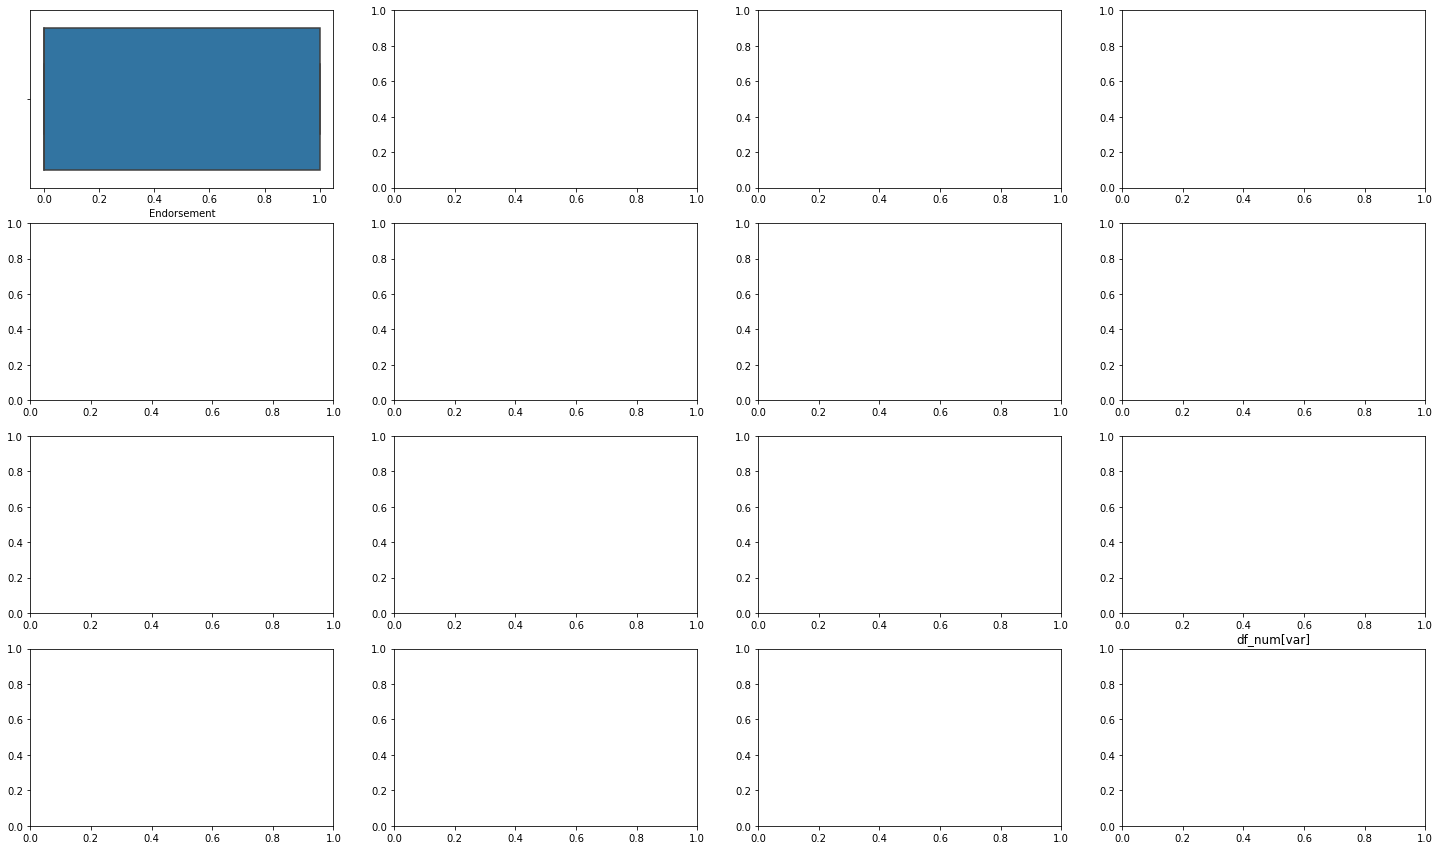

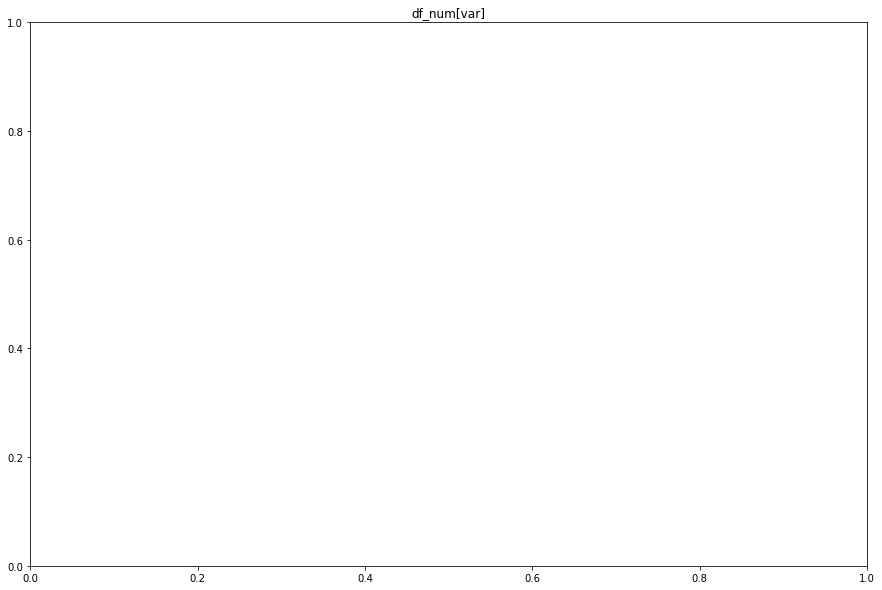

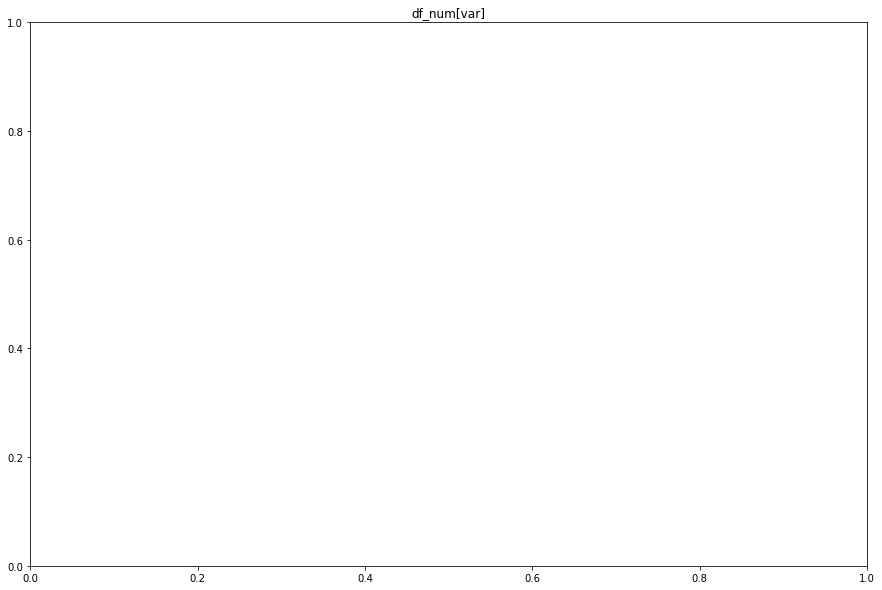

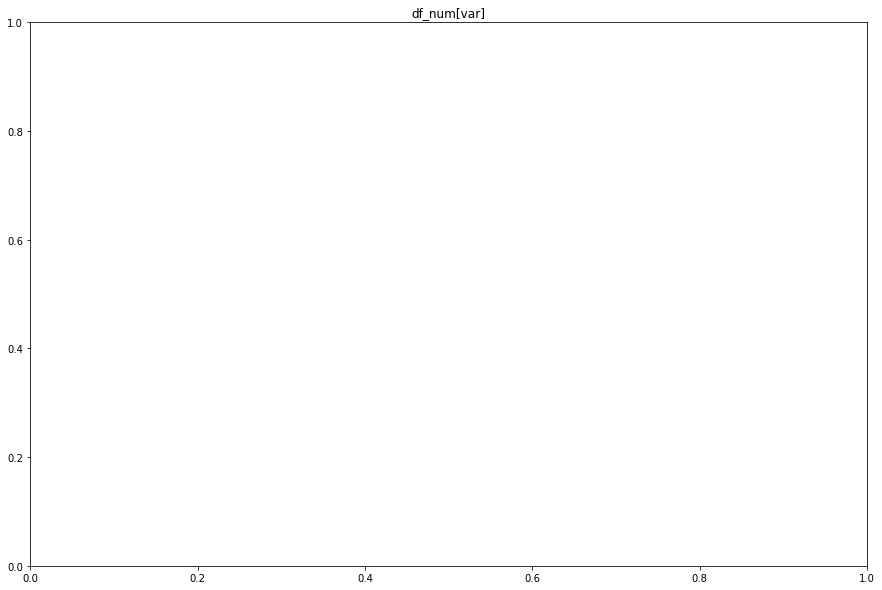

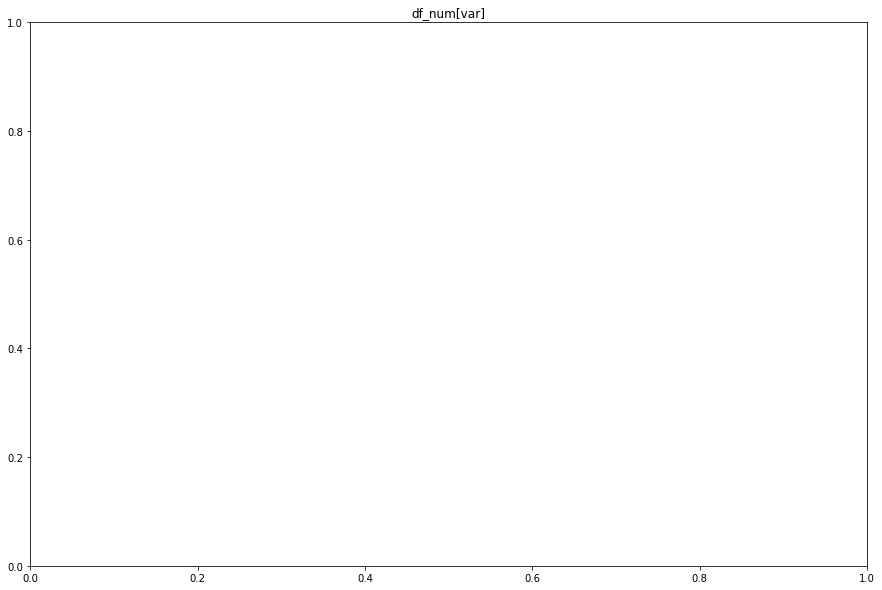

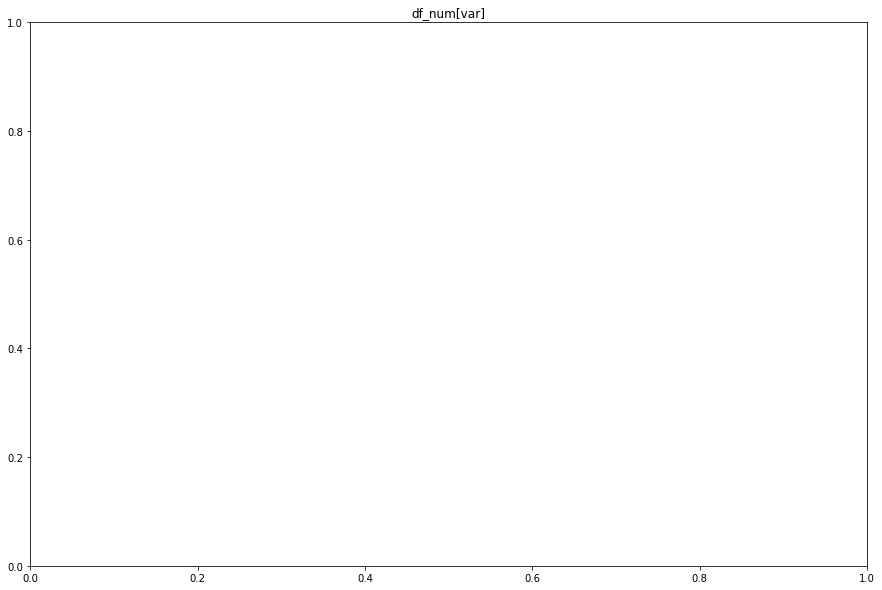

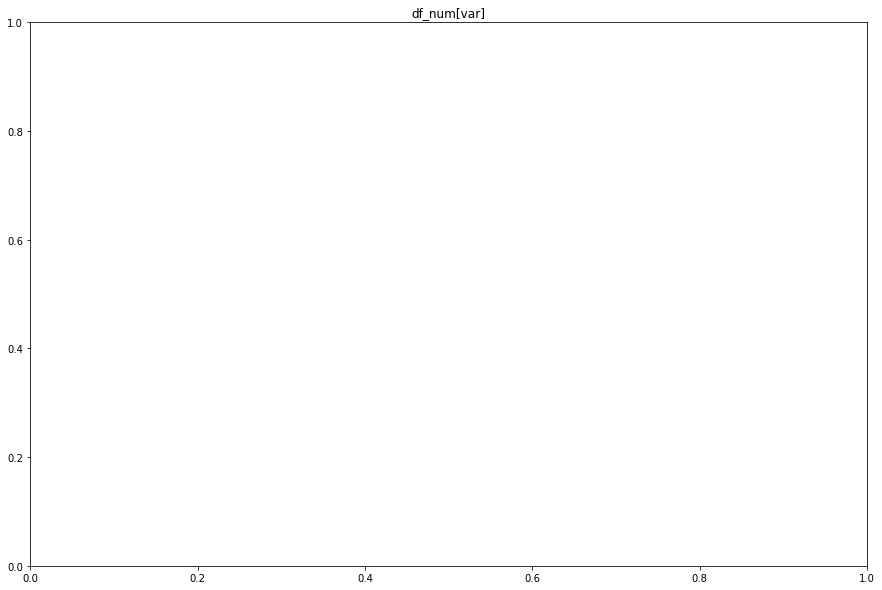

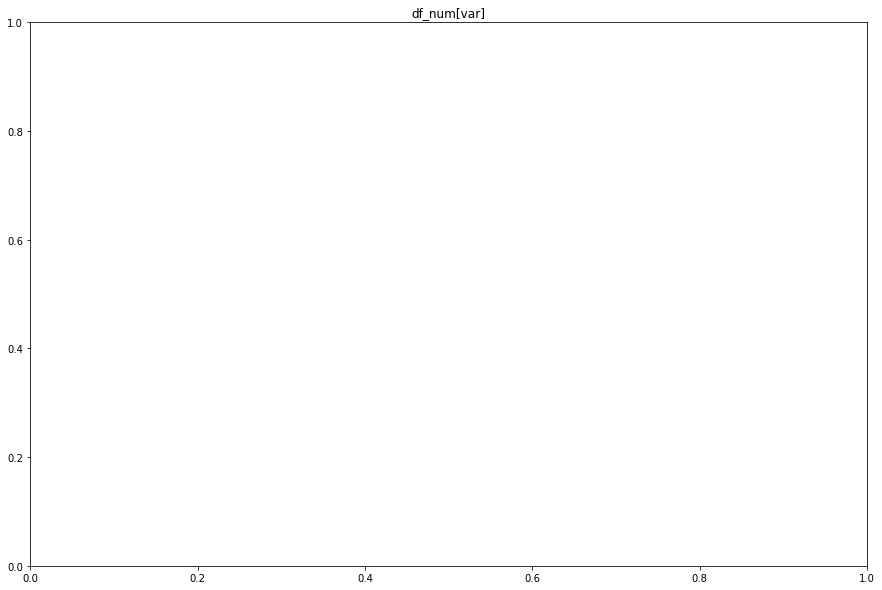

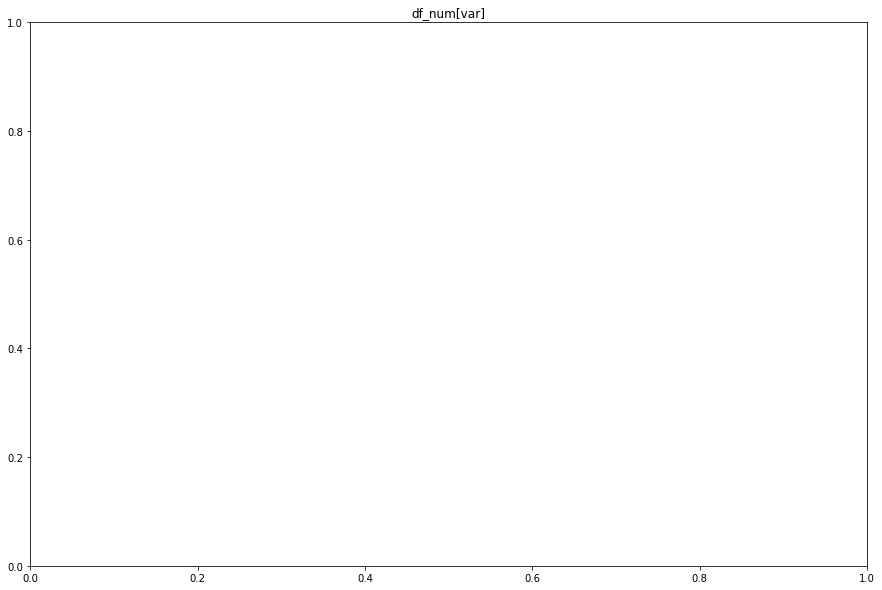

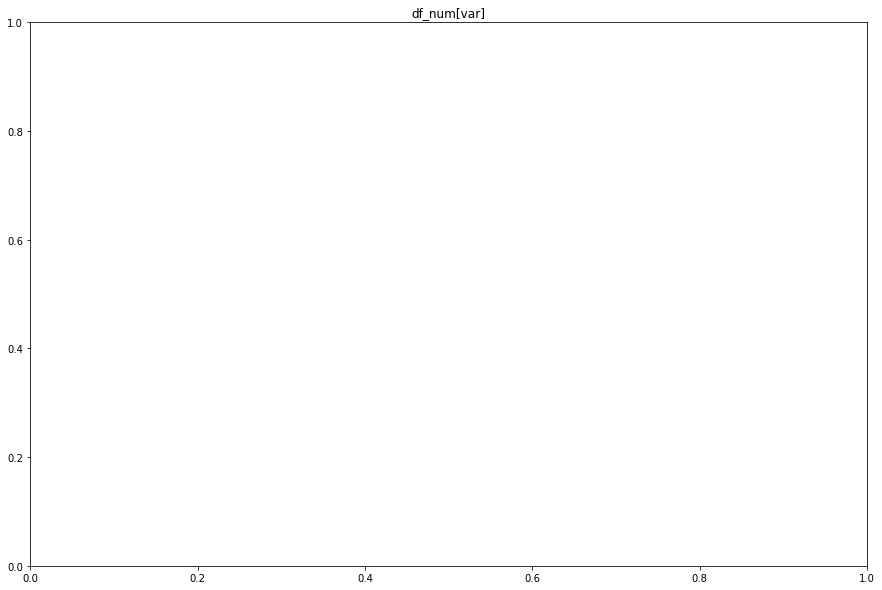

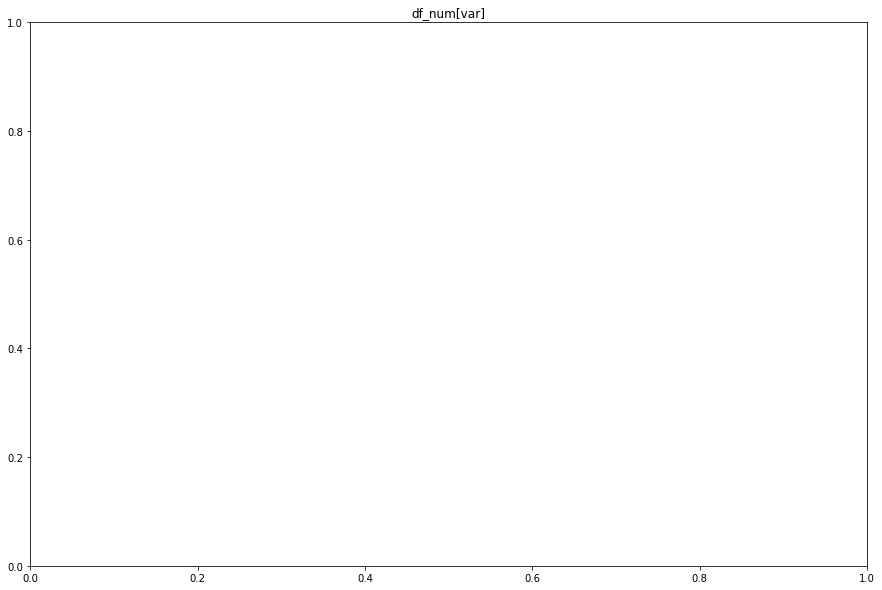

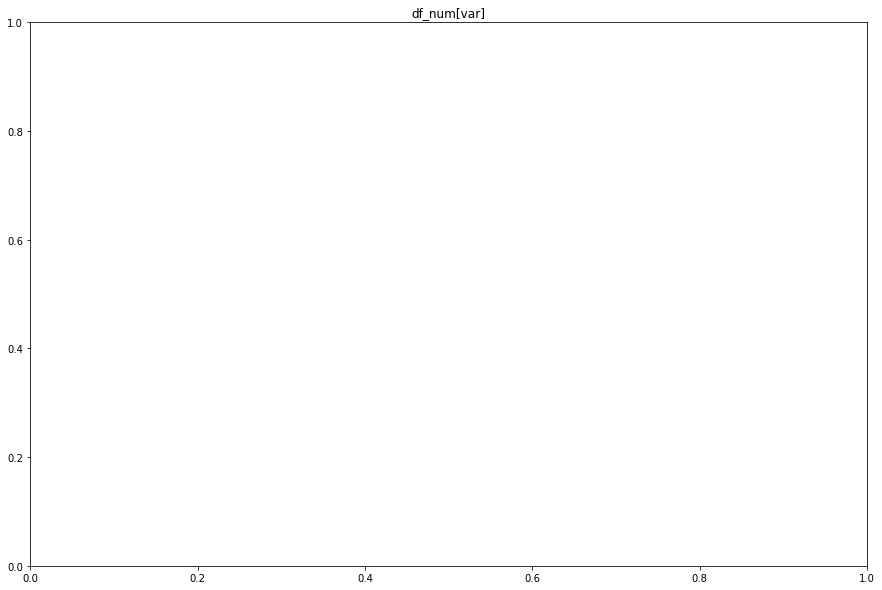

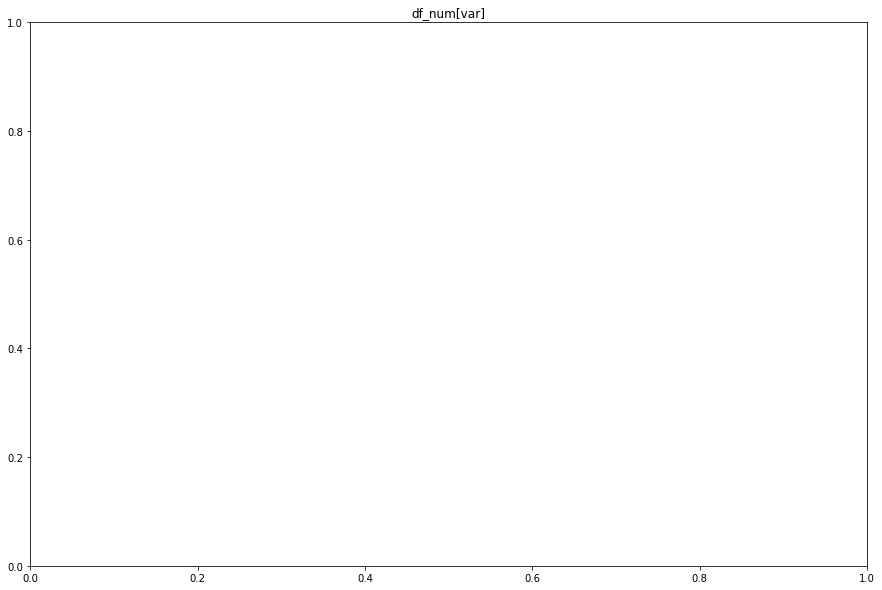

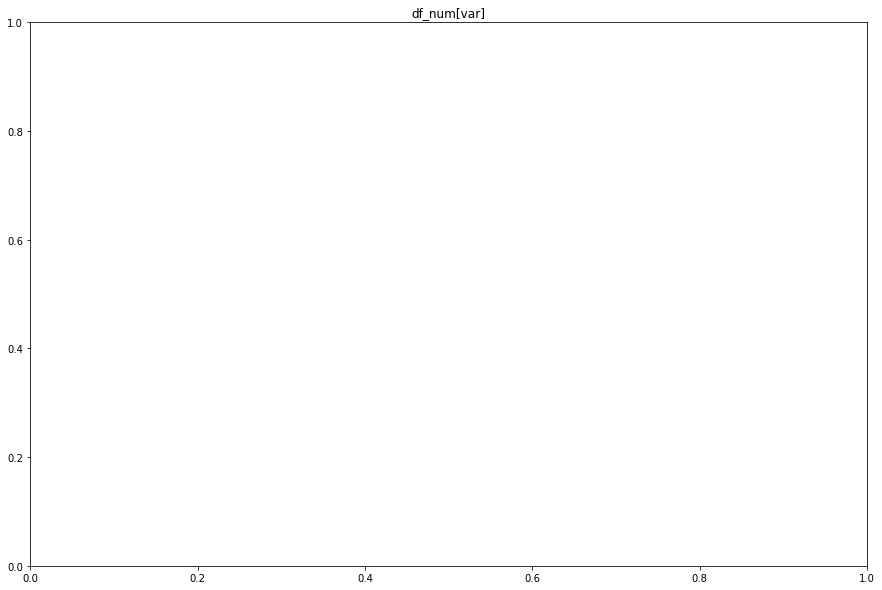

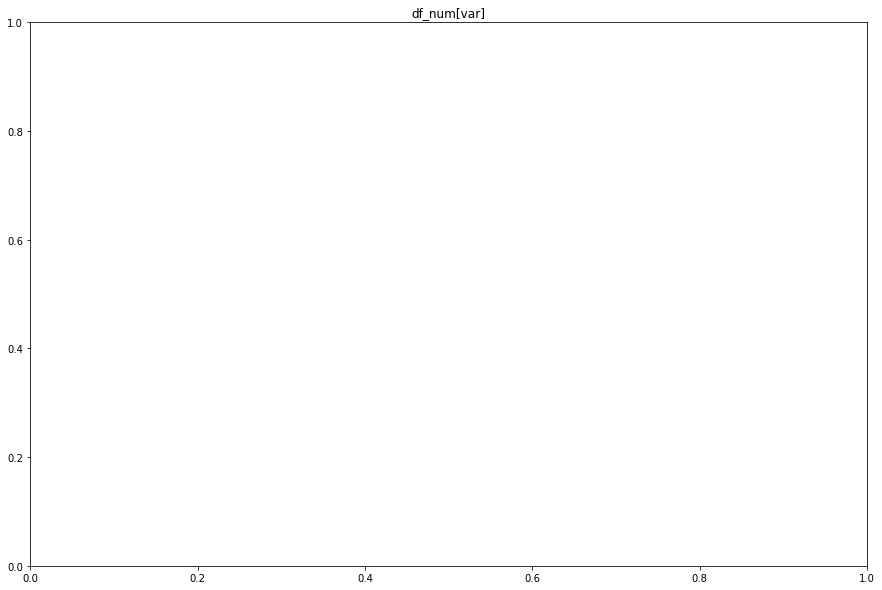

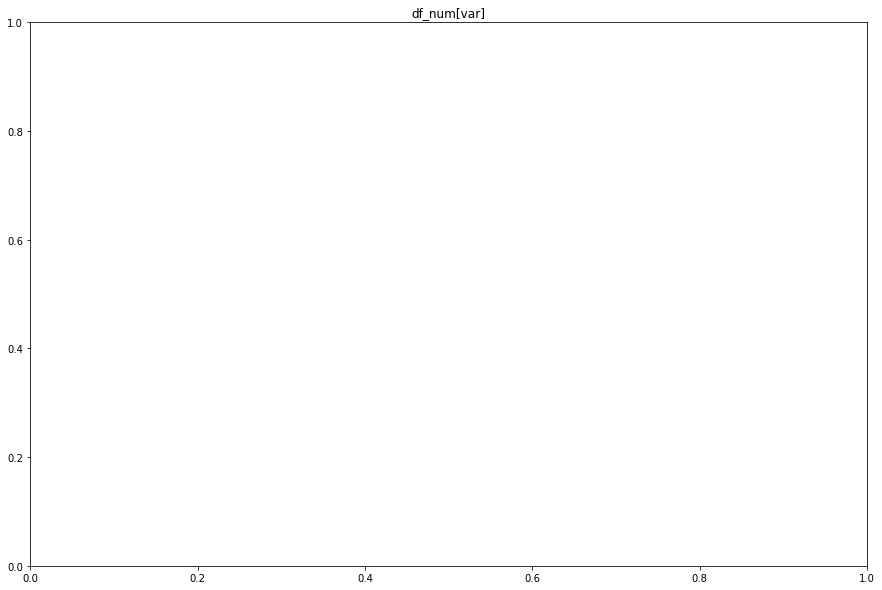

In [25]:
fig, ax=plt.subplots(4,4,figsize=(25,15))
for var, subplot in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[var],ax=subplot)
    plt.title('df_num[var]')
    plt.show()

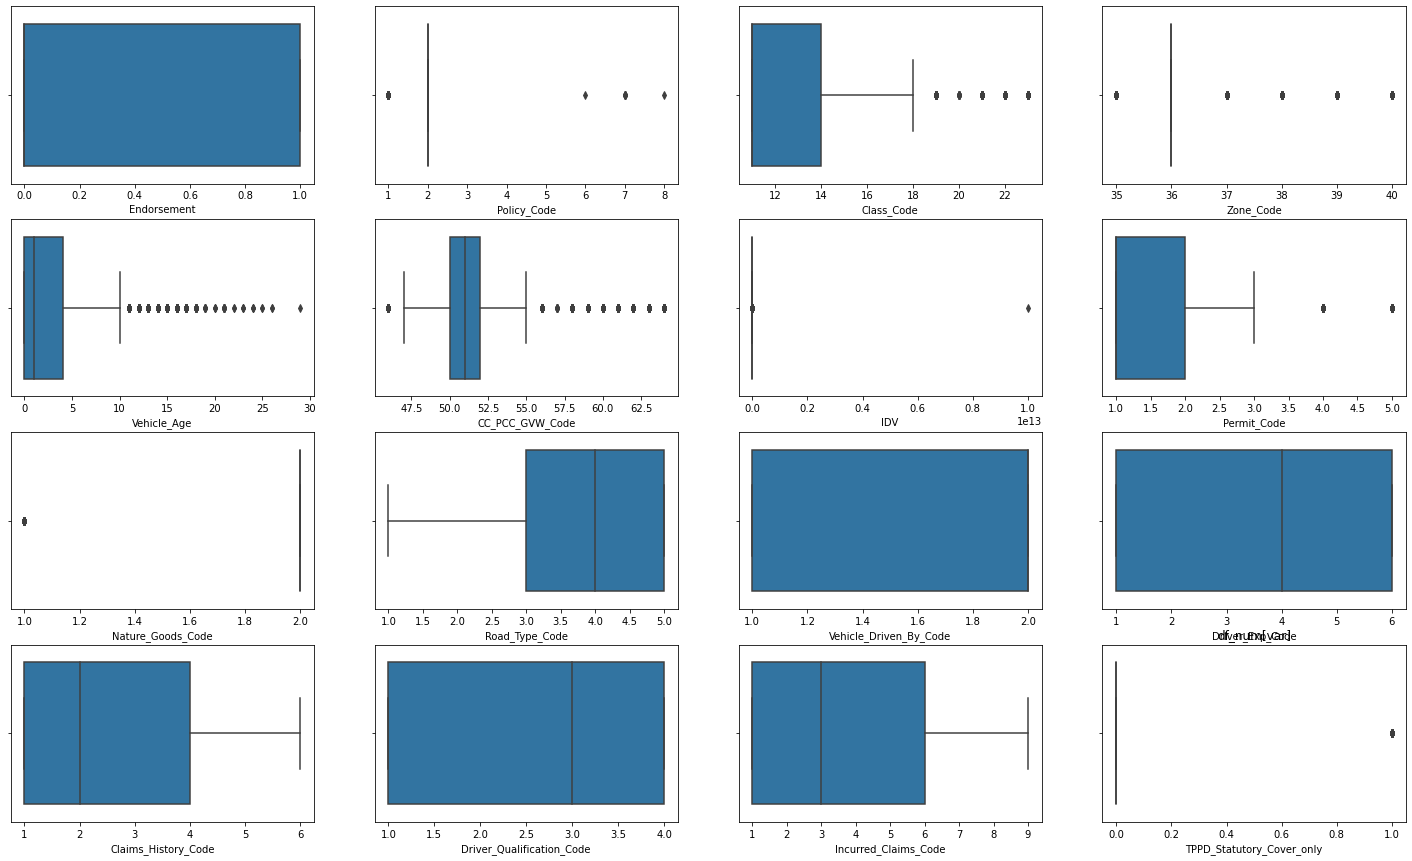

In [26]:
fig, ax=plt.subplots(4,4,figsize=(25,15))
for var, subplot in zip(df_num.columns,ax.flatten()):
  sns.boxplot(df_num[var],ax=subplot)
  plt.title('df_num[var]')
plt.show()


In [27]:
# conversion of numericl values into categorical

In [28]:
df_num.columns

Index(['Endorsement', 'Policy_Code', 'Class_Code', 'Zone_Code', 'Vehicle_Age', 'CC_PCC_GVW_Code', 'IDV', 'Permit_Code', 'Nature_Goods_Code', 'Road_Type_Code', 'Vehicle_Driven_By_Code', 'Driver_Exp_Code', 'Claims_History_Code', 'Driver_Qualification_Code', 'Incurred_Claims_Code', 'TPPD_Statutory_Cover_only', 'Date_Accident_Loss', 'Date_Claim_Intimation', 'TAC_NOL_Code', 'Date_Disbursement', 'OD_Total_Loss', 'DRV_CLAIM_AMT', '_AntiTheft', 'No_Claim_Bonus', 'Net_OD_Premium'], dtype='object')

In [29]:
cat= ['Endorsement', 'Policy_Code','Class_Code','Zone_Code','CC_PCC_GVW_Code','Permit_Code', 'Nature_Goods_Code', 
          'Road_Type_Code', 'Vehicle_Driven_By_Code', 'Driver_Exp_Code', 'Claims_History_Code', 'Driver_Qualification_Code', 
          'Incurred_Claims_Code','TAC_NOL_Code'
          ]


In [31]:
for i in cat:
  df[i]=df[i].astype('object')


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75200 entries, 0 to 75199
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Policy_Year                75200 non-null  object        
 1   Endorsement                75200 non-null  object        
 2   Location_RTA               75197 non-null  object        
 3   Policy_Code                75200 non-null  object        
 4   Class_Code                 75200 non-null  object        
 5   Zone_Code                  75200 non-null  object        
 6   Vehicle_Age                75200 non-null  int64         
 7   CC_PCC_GVW_Code            75200 non-null  object        
 8   Colour_Vehicle             75200 non-null  object        
 9   IDV                        75200 non-null  float64       
 10  Permit_Code                75200 non-null  object        
 11  Nature_Goods_Code          75200 non-null  object        
 12  Road

In [33]:
df_num.shape

(75200, 25)

In [34]:

df_num=df.select_dtypes(exclude='object')
df_num.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75200 entries, 0 to 75199
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Vehicle_Age                75200 non-null  int64         
 1   IDV                        75200 non-null  float64       
 2   TPPD_Statutory_Cover_only  75200 non-null  int64         
 3   Date_Accident_Loss         75200 non-null  datetime64[ns]
 4   Date_Claim_Intimation      75200 non-null  datetime64[ns]
 5   Date_Disbursement          71465 non-null  datetime64[ns]
 6   OD_Total_Loss              75200 non-null  int64         
 7   DRV_CLAIM_AMT              75200 non-null  float64       
 8   _AntiTheft                 75200 non-null  int64         
 9   No_Claim_Bonus             75200 non-null  int64         
 10  Net_OD_Premium             75200 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(6)
memory usage: 6.3 MB


In [35]:

df_cat=df.select_dtypes(include='object')
df_cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75200 entries, 0 to 75199
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Policy_Year                75200 non-null  object
 1   Endorsement                75200 non-null  object
 2   Location_RTA               75197 non-null  object
 3   Policy_Code                75200 non-null  object
 4   Class_Code                 75200 non-null  object
 5   Zone_Code                  75200 non-null  object
 6   CC_PCC_GVW_Code            75200 non-null  object
 7   Colour_Vehicle             75200 non-null  object
 8   Permit_Code                75200 non-null  object
 9   Nature_Goods_Code          75200 non-null  object
 10  Road_Type_Code             75200 non-null  object
 11  Vehicle_Driven_By_Code     75200 non-null  object
 12  Driver_Exp_Code            75200 non-null  object
 13  Claims_History_Code        75200 non-null  object
 14  Driver

In [36]:
df_cat.shape

(75200, 20)

In [37]:
# bi-variate

In [38]:
df.corr()

,Vehicle_Age,IDV,TPPD_Statutory_Cover_only,OD_Total_Loss,DRV_CLAIM_AMT,_AntiTheft,No_Claim_Bonus,Net_OD_Premium
Vehicle_Age,1.000000,-0.003049,-0.017973,-0.057053,-0.026864,-0.007187,0.058997,0.035260
IDV,-0.003049,1.000000,-0.000437,-0.000981,0.118423,-0.001811,-0.002186,-0.002367
TPPD_Statutory_Cover_only,-0.017973,-0.000437,1.000000,0.087294,-0.017364,-0.031366,-0.060137,-0.095432
OD_Total_Loss,-0.057053,-0.000981,0.087294,1.000000,0.228286,-0.054553,-0.094954,-0.168677
DRV_CLAIM_AMT,-0.026864,0.118423,-0.017364,0.228286,1.000000,-0.041616,0.003003,0.076054
_AntiTheft,-0.007187,-0.001811,-0.031366,-0.054553,-0.041616,1.000000,-0.077751,0.122744
No_Claim_Bonus,0.058997,-0.002186,-0.060137,-0.094954,0.003003,-0.077751,1.000000,-0.010712
Net_OD_Premium,0.035260,-0.002367,-0.095432,-0.168677,0.076054,0.122744,-0.010712,1.000000


In [39]:
# we wat tp prove wheteher the correlation is statically significant .hence in end to do some statsically test

In [40]:
st.pearsonr(df.Vehicle_Age,df.Net_OD_Premium)


(0.0352598184060686, 3.9650484964770273e-22)

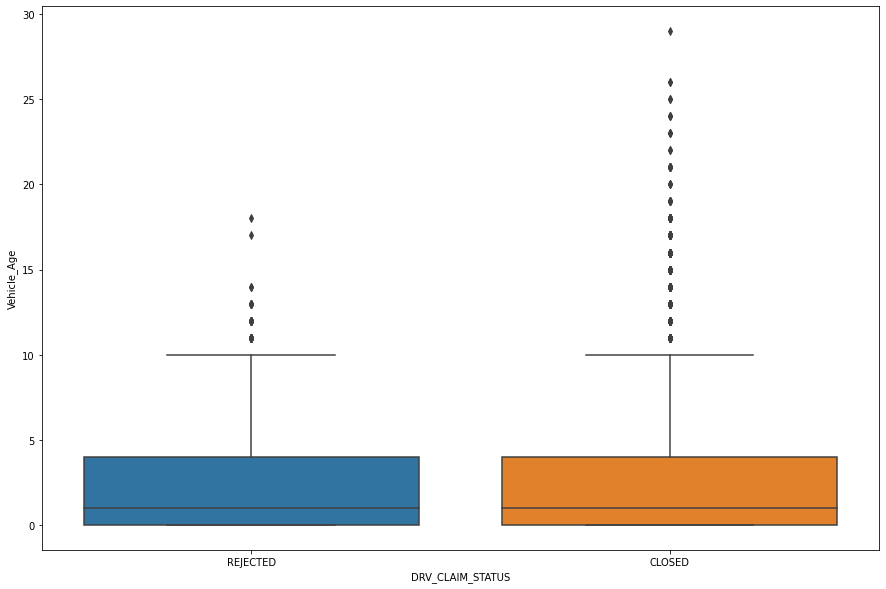

In [41]:
sns.boxplot(df.DRV_CLAIM_STATUS,df_num.Vehicle_Age);

<AxesSubplot:xlabel='Road_Type_Code', ylabel='count'>

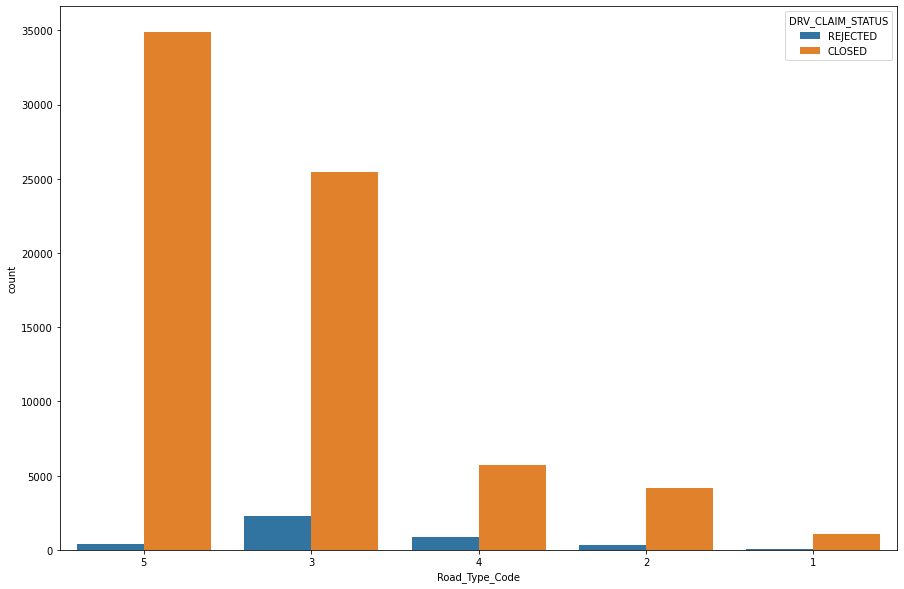

In [42]:
sns.countplot(x='Road_Type_Code', hue='DRV_CLAIM_STATUS',data=df,order=df.Road_Type_Code.value_counts().index )


<AxesSubplot:xlabel='Vehicle_Driven_By_Code', ylabel='count'>

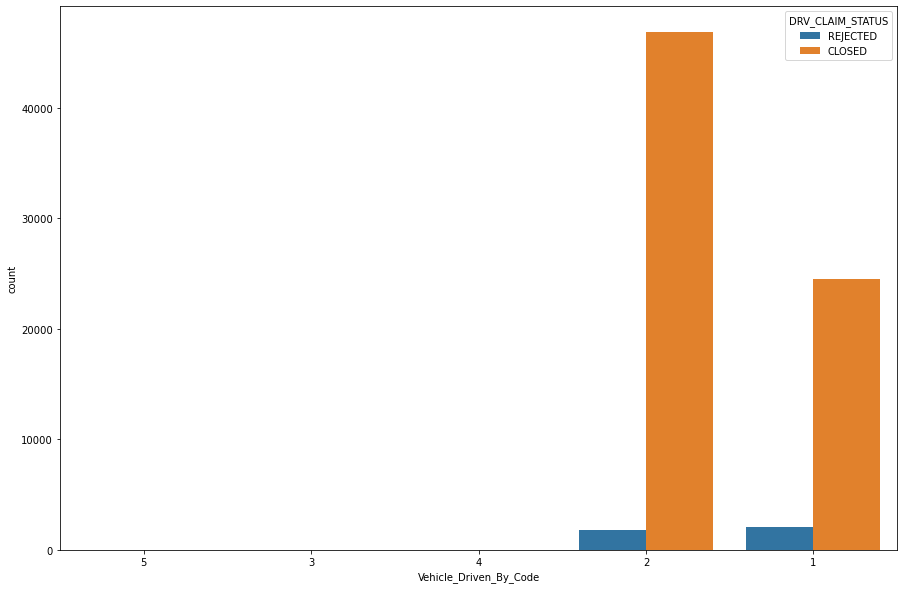

In [43]:
sns.countplot(x='Vehicle_Driven_By_Code', hue='DRV_CLAIM_STATUS',data=df,order=df.Road_Type_Code.value_counts().index )


# chi square test

In [44]:
st.chi2_contingency(pd.crosstab(df.DRV_CLAIM_STATUS,df.Claim_Year))


(7036.661593892817,
 0.0,
 13,
 array([[1.89691489e+00, 9.48457447e-01, 1.89691489e+00, 2.18145213e+01,
         1.04330319e+01, 2.94021809e+01, 5.69074468e+01, 7.49281383e+01,
         1.14763351e+02, 4.46723457e+02, 1.99839984e+03, 2.37996427e+04,
         4.12948888e+04, 3.47135426e+03],
        [1.03085106e-01, 5.15425532e-02, 1.03085106e-01, 1.18547872e+00,
         5.66968085e-01, 1.59781915e+00, 3.09255319e+00, 4.07186170e+00,
         6.23664894e+00, 2.42765426e+01, 1.08600160e+02, 1.29335729e+03,
         2.24411122e+03, 1.88645745e+02]]))

statistical value is 7036.661593892817

p value : 0

degree of freedom = 13

1 as the calculated value is less than 0.05, it means that the assiciation between the categorical variables is significant

2 claim status is impacted by the claim year or influnced by the claim year

In [45]:
st.chi2_contingency(pd.crosstab(df.DRV_CLAIM_STATUS,df.Driver_Qualification_Code))


(743.7275909275469,
 6.915687943584987e-161,
 3,
 array([[18352.65159574, 14843.35904255, 16600.85069149, 21527.13867021],
        [  997.34840426,   806.64095745,   902.14930851,  1169.86132979]]))

In [46]:
st.chi2_contingency(pd.crosstab(df.DRV_CLAIM_STATUS,df.Driver_Exp_Code))


(1333.290606496367,
 3.915671727107809e-286,
 5,
 array([[22815.14388298,  2663.26851064,  4352.4712234 ,  9888.61734043,
          6241.79845745, 25362.70058511],
        [ 1239.85611702,   144.73148936,   236.5287766 ,   537.38265957,
           339.20154255,  1378.29941489]]))

In [47]:
st.chi2_contingency(pd.crosstab(df.DRV_CLAIM_STATUS,df.Policy_Code))


(0.7949900369435544,
 0.9391184555067269,
 4,
 array([[1.34680957e+02, 7.11798345e+04, 9.48457447e-01, 7.58765957e+00,
         9.48457447e-01],
        [7.31904255e+00, 3.86816553e+03, 5.15425532e-02, 4.12340426e-01,
         5.15425532e-02]]))

In [48]:
# multivariate Analysis

In [49]:
df_num.columns

Index(['Vehicle_Age', 'IDV', 'TPPD_Statutory_Cover_only', 'Date_Accident_Loss', 'Date_Claim_Intimation', 'Date_Disbursement', 'OD_Total_Loss', 'DRV_CLAIM_AMT', '_AntiTheft', 'No_Claim_Bonus', 'Net_OD_Premium'], dtype='object')

In [50]:
df_cat.columns

Index(['Policy_Year', 'Endorsement', 'Location_RTA', 'Policy_Code', 'Class_Code', 'Zone_Code', 'CC_PCC_GVW_Code', 'Colour_Vehicle', 'Permit_Code', 'Nature_Goods_Code', 'Road_Type_Code', 'Vehicle_Driven_By_Code', 'Driver_Exp_Code', 'Claims_History_Code', 'Driver_Qualification_Code', 'Incurred_Claims_Code', 'Claim_Year', 'Place_Accident', 'TAC_NOL_Code', 'DRV_CLAIM_STATUS'], dtype='object')

In [51]:
pd.pivot_table(df,index=['DRV_CLAIM_STATUS'],columns=['Claims_History_Code'],values=['DRV_CLAIM_AMT'],aggfunc=np.mean)


DRV_CLAIM_AMT                                                                      
Claims_History_Code             1             2             3             4             5             6
DRV_CLAIM_STATUS                                                                                       
CLOSED               41880.881190  45809.836699  39034.332586  37035.757384  33662.057792  35491.539872
REJECTED                 1.466305      0.645087      0.608305      0.297872      0.463951      0.459004

<AxesSubplot:title={'center':'Stacked bar chart'}, xlabel='Driver_Exp_Code'>

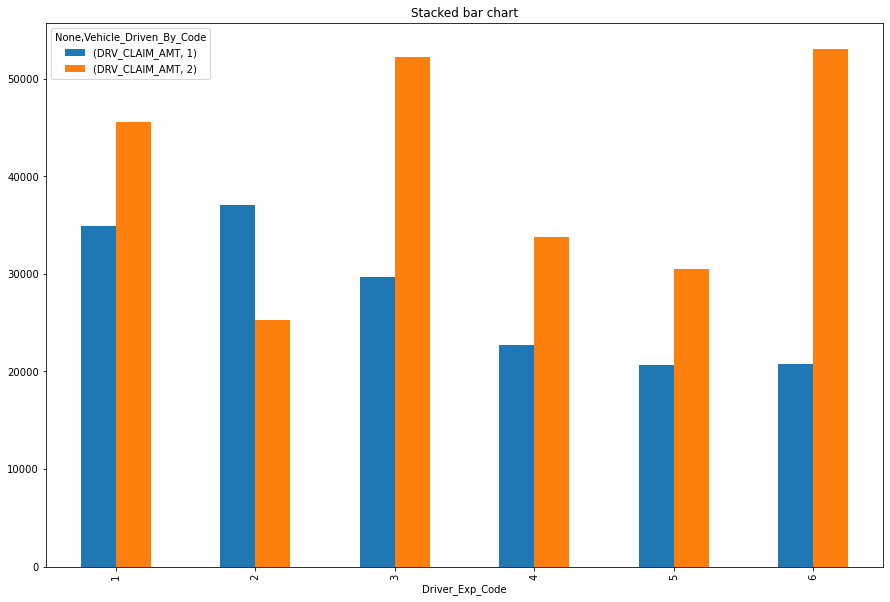

In [52]:
stack= pd.pivot_table(df, index=['Driver_Exp_Code'], columns=['Vehicle_Driven_By_Code'], values=['DRV_CLAIM_AMT'], aggfunc=np.mean )
stack.plot.bar(title='Stacked bar chart', stacked=False, label='Type')


## Feature Engineering

In [53]:
df['claim_processing_time']=(pd.to_datetime(df['Date_Disbursement']))-(pd.to_datetime(df['Date_Claim_Intimation']))


In [54]:
df['claim_processing_time'] =pd.DataFrame(df['claim_processing_time']) 
df['claim_processing_time']


0           NaT
1           NaT
2       60 days
3       60 days
4           NaT
          ...  
75195   60 days
75196   60 days
75197   80 days
75198    2 days
75199   19 days
Name: claim_processing_time, Length: 75200, dtype: timedelta64[ns]

In [55]:
df['claim_processing_time'] = df['claim_processing_time']/ np.timedelta64(1, 'D')


In [56]:
df['claim_processing_time']

0         NaN
1         NaN
2        60.0
3        60.0
4         NaN
         ... 
75195    60.0
75196    60.0
75197    80.0
75198     2.0
75199    19.0
Name: claim_processing_time, Length: 75200, dtype: float64

<AxesSubplot:xlabel='claim_processing_time', ylabel='DRV_CLAIM_AMT'>

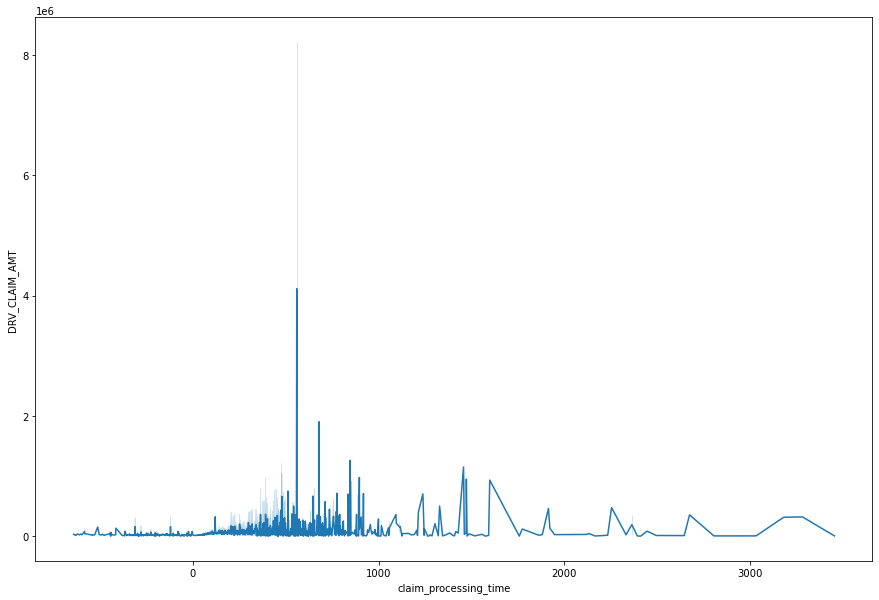

In [57]:
sns.lineplot(df.claim_processing_time, df.DRV_CLAIM_AMT)


In [58]:
df[df.claim_processing_time > 3000]


,Policy_Year,Endorsement,Location_RTA,Policy_Code,Class_Code,Zone_Code,Vehicle_Age,CC_PCC_GVW_Code,Colour_Vehicle,IDV,Permit_Code,Nature_Goods_Code,Road_Type_Code,Vehicle_Driven_By_Code,Driver_Exp_Code,Claims_History_Code,Driver_Qualification_Code,Incurred_Claims_Code,TPPD_Statutory_Cover_only,Claim_Year,Date_Accident_Loss,Place_Accident,Date_Claim_Intimation,TAC_NOL_Code,Date_Disbursement,OD_Total_Loss,DRV_CLAIM_AMT,DRV_CLAIM_STATUS,_AntiTheft,No_Claim_Bonus,Net_OD_Premium,claim_processing_time
48314,1998-99,0,DELHI,2,11,40,0,50,OTHER COLOR,297949.0,2,2,4,2,1,3,1,3,0,2008-09,1999-08-19,"204-R, IST FLOOR, MO",2003-02-04,5,2011-10-21,0,315000.0,CLOSED,0,0,17519,3181.0
61035,2002-03,0,DELHI,2,11,40,0,50,OTHER COLOR,280000.0,2,2,4,2,1,3,2,2,0,2006-07,2003-10-15,"WZB-47,RANGA ENCLAVE",2003-10-30,59,2012-02-17,0,5000.0,CLOSED,0,0,17519,3032.0
62697,2001-02,0,DELHI,2,11,40,0,50,OTHER COLOR,560000.0,2,2,4,2,1,2,4,8,0,2010-11,2002-02-03,JEET HOSPITAL PARK R,2002-02-03,5,2011-01-29,0,320000.0,CLOSED,0,0,17519,3282.0
63012,2001-02,0,DELHI,2,11,40,0,50,OTHER COLOR,297949.0,2,2,4,2,1,1,1,4,0,2011-12,2002-08-30,GOHANA,2002-08-30,5,2012-02-13,0,4500.0,CLOSED,0,1,17519,3454.0


## Outliers

In [59]:
from sklearn.preprocessing import PowerTransformer


In [60]:
# before applying power transformation

In [61]:
df_num.columns

Index(['Vehicle_Age', 'IDV', 'TPPD_Statutory_Cover_only', 'Date_Accident_Loss', 'Date_Claim_Intimation', 'Date_Disbursement', 'OD_Total_Loss', 'DRV_CLAIM_AMT', '_AntiTheft', 'No_Claim_Bonus', 'Net_OD_Premium'], dtype='object')

In [62]:
list1=['Vehicle_Age', 'IDV', 'TPPD_Statutory_Cover_only', 'OD_Total_Loss', 'DRV_CLAIM_AMT', '_AntiTheft', 'No_Claim_Bonus',
       'Net_OD_Premium']


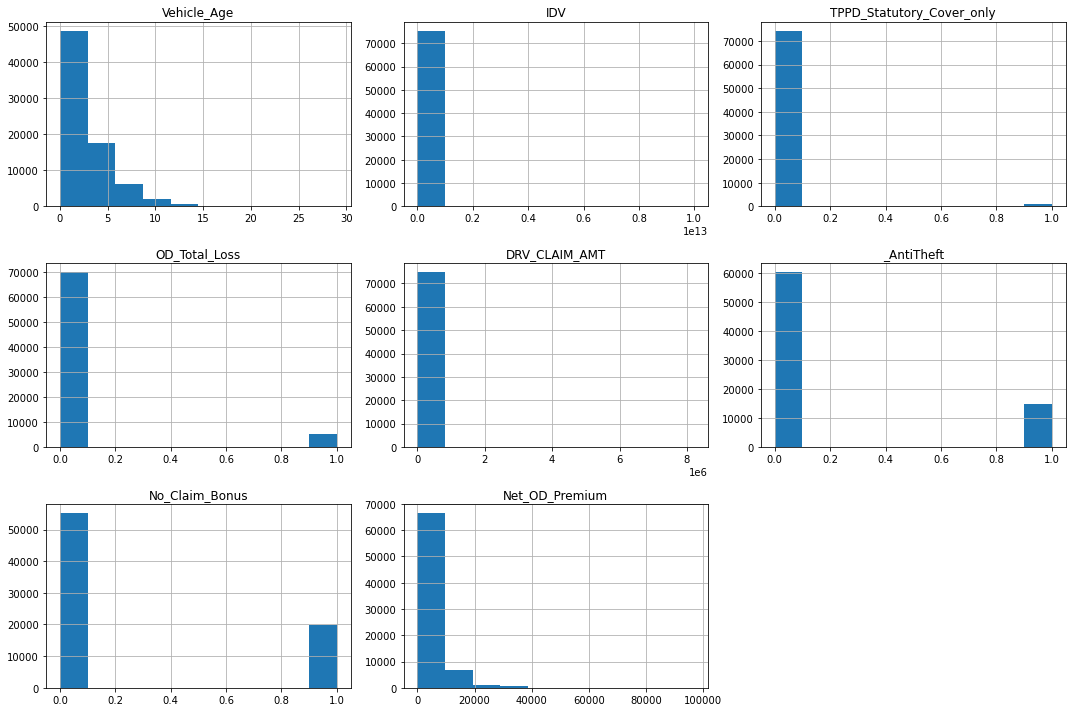

In [63]:
df[['Vehicle_Age', 'IDV', 'TPPD_Statutory_Cover_only', 'OD_Total_Loss', 'DRV_CLAIM_AMT', '_AntiTheft', 'No_Claim_Bonus',
       'Net_OD_Premium']].hist()
plt.tight_layout()
plt.show()


In [64]:
df['PT_Veh_Age'] =PowerTransformer(method='yeo-johnson').fit_transform(df['Vehicle_Age'].values.reshape(-1,1))
df['PT_IDV'] =PowerTransformer(method='yeo-johnson').fit_transform(df['IDV'].values.reshape(-1,1))
df['PT_Stat_Cover'] =PowerTransformer(method='yeo-johnson').fit_transform(df['TPPD_Statutory_Cover_only'].values.reshape(-1,1))
df['PT_OD_Loss'] =PowerTransformer(method='yeo-johnson').fit_transform(df['OD_Total_Loss'].values.reshape(-1,1))
df['PT_DRV_CLM_AMT'] =PowerTransformer(method='yeo-johnson').fit_transform(df['DRV_CLAIM_AMT'].values.reshape(-1,1))
df['PT_No_Claim_Bonus'] =PowerTransformer(method='yeo-johnson').fit_transform(df['No_Claim_Bonus'].values.reshape(-1,1))
df['PT_Net_OD_Premium'] =PowerTransformer(method='yeo-johnson').fit_transform(df['Net_OD_Premium'].values.reshape(-1,1))


In [65]:
# after transformation

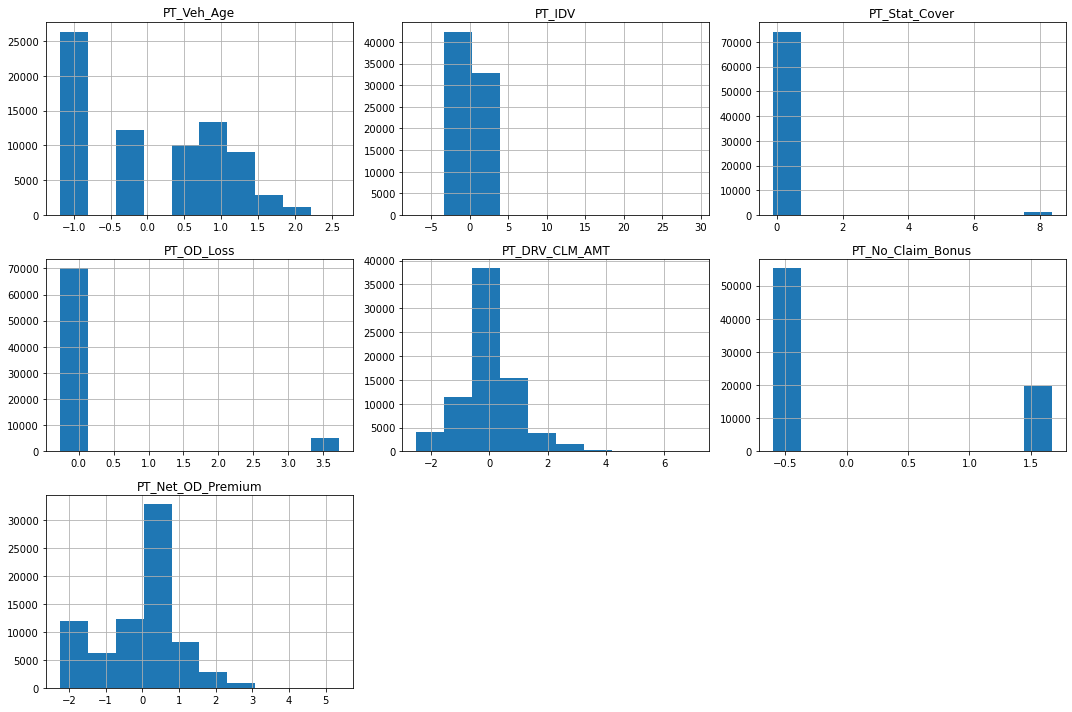

In [66]:
df[['PT_Veh_Age','PT_IDV', 'PT_Stat_Cover', 'PT_OD_Loss', 'PT_DRV_CLM_AMT', 'PT_No_Claim_Bonus',
       'PT_Net_OD_Premium']].hist()
plt.tight_layout()
plt.show()


In [67]:
# statisticaltest - shapiro

H0 : data is normal
    
Ha: data is not normal

In [68]:
df.columns

Index(['Policy_Year', 'Endorsement', 'Location_RTA', 'Policy_Code', 'Class_Code', 'Zone_Code', 'Vehicle_Age', 'CC_PCC_GVW_Code', 'Colour_Vehicle', 'IDV', 'Permit_Code', 'Nature_Goods_Code', 'Road_Type_Code', 'Vehicle_Driven_By_Code', 'Driver_Exp_Code', 'Claims_History_Code', 'Driver_Qualification_Code', 'Incurred_Claims_Code', 'TPPD_Statutory_Cover_only', 'Claim_Year', 'Date_Accident_Loss', 'Place_Accident', 'Date_Claim_Intimation', 'TAC_NOL_Code', 'Date_Disbursement', 'OD_Total_Loss', 'DRV_CLAIM_AMT', 'DRV_CLAIM_STATUS', '_AntiTheft', 'No_Claim_Bonus', 'Net_OD_Premium', 'claim_processing_time', 'PT_Veh_Age', 'PT_IDV', 'PT_Stat_Cover', 'PT_OD_Loss', 'PT_DRV_CLM_AMT', 'PT_No_Claim_Bonus', 'PT_Net_OD_Premium'], dtype='object')

In [69]:
st.shapiro(df.PT)

AttributeError: 'DataFrame' object has no attribute 'PT'

In [70]:
st.skew

<function scipy.stats.stats.skew(a, axis=0, bias=True, nan_policy='propagate')>

In [71]:
st.shapiro(df.PT_IDV)

ShapiroResult(statistic=0.9562820792198181, pvalue=0.0)

In [72]:
st.skew(df.PT_IDV)

0.13158699612761124

In [73]:
st.shapiro(df.PT_Stat_Cover)  

ShapiroResult(statistic=0.09272277355194092, pvalue=0.0)

In [74]:
st.skew(df.TPPD_Statutory_Cover_only)

8.243645643878681

In [ ]:
# why power transformation 
# in skewness

In [ ]:
# scaling

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [76]:
df['sc_Veh_Age'] =sc.fit_transform(df['PT_Veh_Age'].values.reshape(-1,1))
df['sc_IDV'] =sc.fit_transform(df['PT_IDV'].values.reshape(-1,1))
df['sc_Stat_Cover'] =sc.fit_transform(df['PT_Stat_Cover'].values.reshape(-1,1))
df['sc_OD_Loss'] =sc.fit_transform(df['PT_OD_Loss'].values.reshape(-1,1))
df['sc_DRV_CLM_AMT'] =sc.fit_transform(df['PT_DRV_CLM_AMT'].values.reshape(-1,1))
df['sc_No_Claim_Bonus'] =sc.fit_transform(df['PT_No_Claim_Bonus'].values.reshape(-1,1))
df['sc_Net_OD_Premium'] =sc.fit_transform(df['PT_Net_OD_Premium'].values.reshape(-1,1))


In [77]:
df.head()

,Policy_Year,Endorsement,Location_RTA,Policy_Code,Class_Code,Zone_Code,Vehicle_Age,CC_PCC_GVW_Code,Colour_Vehicle,IDV,Permit_Code,Nature_Goods_Code,Road_Type_Code,Vehicle_Driven_By_Code,Driver_Exp_Code,Claims_History_Code,Driver_Qualification_Code,Incurred_Claims_Code,TPPD_Statutory_Cover_only,Claim_Year,Date_Accident_Loss,Place_Accident,Date_Claim_Intimation,TAC_NOL_Code,Date_Disbursement,OD_Total_Loss,DRV_CLAIM_AMT,DRV_CLAIM_STATUS,_AntiTheft,No_Claim_Bonus,Net_OD_Premium,claim_processing_time,PT_Veh_Age,PT_IDV,PT_Stat_Cover,PT_OD_Loss,PT_DRV_CLM_AMT,PT_No_Claim_Bonus,PT_Net_OD_Premium,sc_Veh_Age,sc_IDV,sc_Stat_Cover,sc_OD_Loss,sc_DRV_CLM_AMT,sc_No_Claim_Bonus,sc_Net_OD_Premium
0,2011-12,0,GOA,2,11,36,7,50,OTHER COLOR,104000.0,1,2,3,1,6,4,2,2,0,2012-13,2011-10-14,GOA,2011-10-15,59,NaT,0,0.0,REJECTED,0,0,5088,NaN,1.454822,-0.679118,-0.119571,-0.268421,-2.496671,-0.599224,0.235886,1.454822,-0.679118,-0.119571,-0.268421,-2.496671,-0.599224,0.235886
1,2011-12,0,AKOLA,2,11,36,7,50,OTHER COLOR,88000.0,1,2,3,1,6,2,1,5,0,2012-13,2011-10-08,AKOLA,2011-10-14,59,NaT,0,0.0,REJECTED,0,0,4712,NaN,1.454822,-0.814440,-0.119571,-0.268421,-2.496671,-0.599224,0.160604,1.454822,-0.814440,-0.119571,-0.268421,-2.496671,-0.599224,0.160604
2,2011-12,0,NAGPUR,2,14,36,2,47,OTHER COLOR,29850.0,1,2,3,1,1,5,2,2,0,2012-13,2011-10-12,NAGPUR,2011-10-14,59,2011-12-13,0,1876.0,CLOSED,0,0,330,60.0,0.361945,-1.653832,-0.119571,-0.268421,-0.938658,-0.599224,-1.513020,0.361945,-1.653832,-0.119571,-0.268421,-0.938658,-0.599224,-1.513020
3,2010-11,0,MUMBAI WEST,2,14,35,3,47,OTHER COLOR,30000.0,1,2,3,1,1,6,2,8,0,2012-13,2011-10-09,MUMBAI WEST,2011-10-14,59,2011-12-13,0,5026.0,CLOSED,0,0,405,60.0,0.707797,-1.650082,-0.119571,-0.268421,-0.517881,-0.599224,-1.432140,0.707797,-1.650082,-0.119571,-0.268421,-0.517881,-0.599224,-1.432140
4,2010-11,0,RANCHI,2,11,36,4,50,OTHER COLOR,143140.0,1,2,3,1,6,2,4,1,0,2012-13,2011-10-09,RANCHI,2011-10-15,59,NaT,0,0.0,REJECTED,0,0,2832,NaN,0.961089,-0.416020,-0.119571,-0.268421,-2.496671,-0.599224,-0.290563,0.961089,-0.416020,-0.119571,-0.268421,-2.496671,-0.599224,-0.290563


In [ ]:
# Num columns - IDV not imp
# cat column - policy code not imp


## Encoding

In [78]:
df.select_dtypes(include='object').nunique()

Policy_Year                     15
Endorsement                      2
Location_RTA                  5597
Policy_Code                      5
Class_Code                      10
Zone_Code                        6
CC_PCC_GVW_Code                 19
Colour_Vehicle                 103
Permit_Code                      5
Nature_Goods_Code                2
Road_Type_Code                   5
Vehicle_Driven_By_Code           2
Driver_Exp_Code                  6
Claims_History_Code              6
Driver_Qualification_Code        4
Incurred_Claims_Code             9
Claim_Year                      14
Place_Accident               15552
TAC_NOL_Code                    27
DRV_CLAIM_STATUS                 2
dtype: int64

- Policy_year and claim_year will be treated seperately

- We will do frequency encoding for Location_RTA, Place_Accident and Colour_Vehicle

In [79]:
def freq_encod(col):    
    dic = df[col].value_counts().to_dict()

    dic = {i:round(j/(len(df)),5) for i,j in dic.items()}

    df[col] = df[col].map(dic)


In [82]:
fe = ['Location_RTA', 'Place_Accident', 'Colour_Vehicle']
for i in fe:
    freq_encod(i)

In [83]:
df.head()

,Policy_Year,Endorsement,Location_RTA,Policy_Code,Class_Code,Zone_Code,Vehicle_Age,CC_PCC_GVW_Code,Colour_Vehicle,IDV,Permit_Code,Nature_Goods_Code,Road_Type_Code,Vehicle_Driven_By_Code,Driver_Exp_Code,Claims_History_Code,Driver_Qualification_Code,Incurred_Claims_Code,TPPD_Statutory_Cover_only,Claim_Year,Date_Accident_Loss,Place_Accident,Date_Claim_Intimation,TAC_NOL_Code,Date_Disbursement,OD_Total_Loss,DRV_CLAIM_AMT,DRV_CLAIM_STATUS,_AntiTheft,No_Claim_Bonus,Net_OD_Premium,claim_processing_time,PT_Veh_Age,PT_IDV,PT_Stat_Cover,PT_OD_Loss,PT_DRV_CLM_AMT,PT_No_Claim_Bonus,PT_Net_OD_Premium,sc_Veh_Age,sc_IDV,sc_Stat_Cover,sc_OD_Loss,sc_DRV_CLM_AMT,sc_No_Claim_Bonus,sc_Net_OD_Premium
0,2011-12,0,0.00180,2,11,36,7,50,0.86181,104000.0,1,2,3,1,6,4,2,2,0,2012-13,2011-10-14,0.00351,2011-10-15,59,NaT,0,0.0,REJECTED,0,0,5088,NaN,1.454822,-0.679118,-0.119571,-0.268421,-2.496671,-0.599224,0.235886,1.454822,-0.679118,-0.119571,-0.268421,-2.496671,-0.599224,0.235886
1,2011-12,0,0.00261,2,11,36,7,50,0.86181,88000.0,1,2,3,1,6,2,1,5,0,2012-13,2011-10-08,0.00122,2011-10-14,59,NaT,0,0.0,REJECTED,0,0,4712,NaN,1.454822,-0.814440,-0.119571,-0.268421,-2.496671,-0.599224,0.160604,1.454822,-0.814440,-0.119571,-0.268421,-2.496671,-0.599224,0.160604
2,2011-12,0,0.00713,2,14,36,2,47,0.86181,29850.0,1,2,3,1,1,5,2,2,0,2012-13,2011-10-12,0.00624,2011-10-14,59,2011-12-13,0,1876.0,CLOSED,0,0,330,60.0,0.361945,-1.653832,-0.119571,-0.268421,-0.938658,-0.599224,-1.513020,0.361945,-1.653832,-0.119571,-0.268421,-0.938658,-0.599224,-1.513020
3,2010-11,0,0.00586,2,14,35,3,47,0.86181,30000.0,1,2,3,1,1,6,2,8,0,2012-13,2011-10-09,0.00305,2011-10-14,59,2011-12-13,0,5026.0,CLOSED,0,0,405,60.0,0.707797,-1.650082,-0.119571,-0.268421,-0.517881,-0.599224,-1.432140,0.707797,-1.650082,-0.119571,-0.268421,-0.517881,-0.599224,-1.432140
4,2010-11,0,0.00513,2,11,36,4,50,0.86181,143140.0,1,2,3,1,6,2,4,1,0,2012-13,2011-10-09,0.00403,2011-10-15,59,NaT,0,0.0,REJECTED,0,0,2832,NaN,0.961089,-0.416020,-0.119571,-0.268421,-2.496671,-0.599224,-0.290563,0.961089,-0.416020,-0.119571,-0.268421,-2.496671,-0.599224,-0.290563


In [84]:
df['Colour_Vehicle'].value_counts()

0.86181    64808
0.03941     2964
0.02859     2150
0.01503     1130
0.01238      931
0.00689      518
0.00528      397
0.00524      394
0.00339      255
0.00266      200
0.00263      198
0.00253      190
0.00118       89
0.00113       85
0.00076       57
0.00074       56
0.00072       54
0.00035       52
0.00066       50
0.00007       45
0.00055       41
0.00053       40
0.00051       38
0.00045       34
0.00044       33
0.00005       32
0.00036       27
0.00033       25
0.00001       24
0.00008       24
0.00031       23
0.00029       22
0.00009       21
0.00027       20
0.00013       20
0.00003       20
0.00024       18
0.00012       18
0.00023       17
0.00021       16
0.00011       16
0.00020       15
0.00017       13
0.00015       11
0.00004        9
Name: Colour_Vehicle, dtype: int64

In [85]:
# Encoding of Policy year and Claim year
df['en_Policy_Year']= df['Policy_Year'].replace({'1998-99':1, '1999-00':2,'2000-01':3,'2001-02':4,'2002-03':5,'2003-04':6,'2004-05':7,
                                                 '2005-06':8,'2006-07':9,'2007-08':10,'2008-09':11,'2009-10':12,'2010-11':13,'2011-12':14,'2012-13':15})


In [86]:
df['en_Policy_Year'].value_counts()

13    48279
14    16265
12     8476
11     1375
10      353
9       152
8       106
7        62
6        51
4        32
5        25
3        12
1         7
2         4
15        1
Name: en_Policy_Year, dtype: int64

In [87]:
df['en_Claim_Year']= df['Claim_Year'].replace({'1998-99':1, '1999-00':2,'2000-01':3,'2001-02':4,'2002-03':5,'2003-04':6,'2004-05':7,
                                                 '2005-06':8,'2006-07':9,'2007-08':10,'2008-09':11,'2009-10':12,'2010-11':13,'2011-12':14,'2012-13':15})


In [88]:
df['en_Claim_Year'].value_counts()

14    43539
13    25093
15     3660
12     2107
11      471
10      121
9        79
8        60
7        31
5        23
6        11
2         2
4         2
3         1
Name: en_Claim_Year, dtype: int64

**Encodig for target column**

In [90]:
df['DRV_CLAIM_STATUS'] = df['DRV_CLAIM_STATUS'].replace({'CLOSED':0,'REJECTED':1})

## Remove the columns that are not required- Feature Engineering

In [91]:
df_new =df.drop(['Date_Accident_Loss','Date_Claim_Intimation'],axis=1)
df_new.columns
    

Index(['Policy_Year', 'Endorsement', 'Location_RTA', 'Policy_Code', 'Class_Code', 'Zone_Code', 'Vehicle_Age', 'CC_PCC_GVW_Code', 'Colour_Vehicle', 'IDV', 'Permit_Code', 'Nature_Goods_Code', 'Road_Type_Code', 'Vehicle_Driven_By_Code', 'Driver_Exp_Code', 'Claims_History_Code', 'Driver_Qualification_Code', 'Incurred_Claims_Code', 'TPPD_Statutory_Cover_only', 'Claim_Year', 'Place_Accident', 'TAC_NOL_Code', 'Date_Disbursement', 'OD_Total_Loss', 'DRV_CLAIM_AMT', 'DRV_CLAIM_STATUS', '_AntiTheft', 'No_Claim_Bonus', 'Net_OD_Premium', 'claim_processing_time', 'PT_Veh_Age', 'PT_IDV', 'PT_Stat_Cover', 'PT_OD_Loss', 'PT_DRV_CLM_AMT', 'PT_No_Claim_Bonus', 'PT_Net_OD_Premium', 'sc_Veh_Age', 'sc_IDV', 'sc_Stat_Cover', 'sc_OD_Loss', 'sc_DRV_CLM_AMT', 'sc_No_Claim_Bonus', 'sc_Net_OD_Premium', 'en_Policy_Year', 'en_Claim_Year'], dtype='object')

**Drop duplicate columns**

- We are dropping these columns as these are power transformed on which we get the scaled data

In [92]:
df_new =df_new.drop(['PT_Veh_Age', 'PT_IDV', 'PT_Stat_Cover', 'PT_OD_Loss', 'PT_DRV_CLM_AMT',
 'PT_No_Claim_Bonus', 'PT_Net_OD_Premium'],axis=1)


- Below columns are original columns which were Power Transformed as well as sclaed.
- Hence, dropping these columns

In [93]:
df_new =df_new.drop(['Policy_Year','Vehicle_Age', 'IDV', 'TPPD_Statutory_Cover_only', 'OD_Total_Loss', 'DRV_CLAIM_AMT',
 'No_Claim_Bonus', 'Net_OD_Premium','Date_Disbursement','Claim_Year'],axis=1)


In [94]:
df_new.columns

Index(['Endorsement', 'Location_RTA', 'Policy_Code', 'Class_Code', 'Zone_Code', 'CC_PCC_GVW_Code', 'Colour_Vehicle', 'Permit_Code', 'Nature_Goods_Code', 'Road_Type_Code', 'Vehicle_Driven_By_Code', 'Driver_Exp_Code', 'Claims_History_Code', 'Driver_Qualification_Code', 'Incurred_Claims_Code', 'Place_Accident', 'TAC_NOL_Code', 'DRV_CLAIM_STATUS', '_AntiTheft', 'claim_processing_time', 'sc_Veh_Age', 'sc_IDV', 'sc_Stat_Cover', 'sc_OD_Loss', 'sc_DRV_CLM_AMT', 'sc_No_Claim_Bonus', 'sc_Net_OD_Premium', 'en_Policy_Year', 'en_Claim_Year'], dtype='object')

In [95]:
df_new.head()

,Endorsement,Location_RTA,Policy_Code,Class_Code,Zone_Code,CC_PCC_GVW_Code,Colour_Vehicle,Permit_Code,Nature_Goods_Code,Road_Type_Code,Vehicle_Driven_By_Code,Driver_Exp_Code,Claims_History_Code,Driver_Qualification_Code,Incurred_Claims_Code,Place_Accident,TAC_NOL_Code,DRV_CLAIM_STATUS,_AntiTheft,claim_processing_time,sc_Veh_Age,sc_IDV,sc_Stat_Cover,sc_OD_Loss,sc_DRV_CLM_AMT,sc_No_Claim_Bonus,sc_Net_OD_Premium,en_Policy_Year,en_Claim_Year
0,0,0.00180,2,11,36,50,0.86181,1,2,3,1,6,4,2,2,0.00351,59,1,0,NaN,1.454822,-0.679118,-0.119571,-0.268421,-2.496671,-0.599224,0.235886,14,15
1,0,0.00261,2,11,36,50,0.86181,1,2,3,1,6,2,1,5,0.00122,59,1,0,NaN,1.454822,-0.814440,-0.119571,-0.268421,-2.496671,-0.599224,0.160604,14,15
2,0,0.00713,2,14,36,47,0.86181,1,2,3,1,1,5,2,2,0.00624,59,0,0,60.0,0.361945,-1.653832,-0.119571,-0.268421,-0.938658,-0.599224,-1.513020,14,15
3,0,0.00586,2,14,35,47,0.86181,1,2,3,1,1,6,2,8,0.00305,59,0,0,60.0,0.707797,-1.650082,-0.119571,-0.268421,-0.517881,-0.599224,-1.432140,13,15
4,0,0.00513,2,11,36,50,0.86181,1,2,3,1,6,2,4,1,0.00403,59,1,0,NaN,0.961089,-0.416020,-0.119571,-0.268421,-2.496671,-0.599224,-0.290563,13,15


## Clustering

In [96]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75200 entries, 0 to 75199
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Endorsement                75200 non-null  object 
 1   Location_RTA               75197 non-null  float64
 2   Policy_Code                75200 non-null  object 
 3   Class_Code                 75200 non-null  object 
 4   Zone_Code                  75200 non-null  object 
 5   CC_PCC_GVW_Code            75200 non-null  object 
 6   Colour_Vehicle             75200 non-null  float64
 7   Permit_Code                75200 non-null  object 
 8   Nature_Goods_Code          75200 non-null  object 
 9   Road_Type_Code             75200 non-null  object 
 10  Vehicle_Driven_By_Code     75200 non-null  object 
 11  Driver_Exp_Code            75200 non-null  object 
 12  Claims_History_Code        75200 non-null  object 
 13  Driver_Qualification_Code  75200 non-null  obj

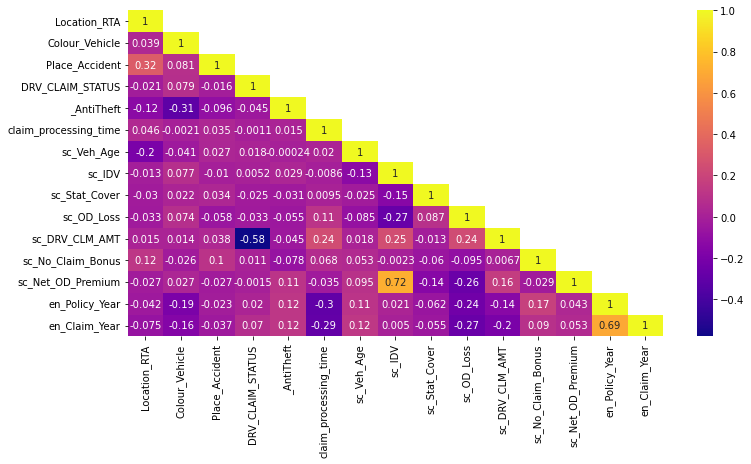

In [97]:
plt.figure(figsize=(12,6))
sns.heatmap(df_new.corr(),cmap='plasma',fmt='.2g',annot=True,mask=np.triu(df_new.corr(),+1))
plt.show()


**Remove the dependent variable**

In [98]:
df_new =df_new.drop(['DRV_CLAIM_STATUS'],axis=1)


In [99]:
df_new =df_new.drop(['claim_processing_time'],axis=1)


In [100]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75200 entries, 0 to 75199
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Endorsement                75200 non-null  object 
 1   Location_RTA               75197 non-null  float64
 2   Policy_Code                75200 non-null  object 
 3   Class_Code                 75200 non-null  object 
 4   Zone_Code                  75200 non-null  object 
 5   CC_PCC_GVW_Code            75200 non-null  object 
 6   Colour_Vehicle             75200 non-null  float64
 7   Permit_Code                75200 non-null  object 
 8   Nature_Goods_Code          75200 non-null  object 
 9   Road_Type_Code             75200 non-null  object 
 10  Vehicle_Driven_By_Code     75200 non-null  object 
 11  Driver_Exp_Code            75200 non-null  object 
 12  Claims_History_Code        75200 non-null  object 
 13  Driver_Qualification_Code  75200 non-null  obj

**Missing values-columns-Location RTA**

In [101]:
df_new.fillna(999,inplace=True)

In [103]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 11 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_new)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]


,num_clusters,cluster_errors
0,1,2.846058e+07
1,2,7.139983e+06
2,3,4.147509e+06
3,4,2.939815e+06
4,5,2.613591e+06
5,6,2.358333e+06
6,7,2.143470e+06
7,8,1.976424e+06
8,9,1.868835e+06
9,10,1.767900e+06


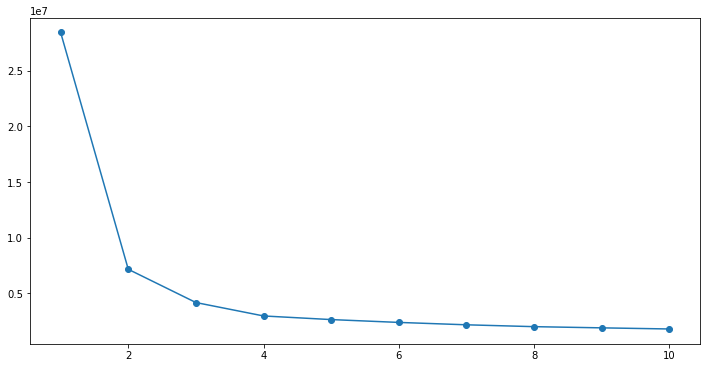

In [104]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )


k = 3 will the optimal number of clusters that can be considered

**Silhoutte Score**- it is used to determine the quality of the cluster

In [105]:
from sklearn.metrics import silhouette_score, silhouette_samples


In [106]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5,]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_new)
    score = silhouette_score(df_new, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))


For 2 clusters the silhouette score is 0.8077012273280768)
For 3 clusters the silhouette score is 0.8081849835726194)
For 4 clusters the silhouette score is 0.46741840643772464)
For 5 clusters the silhouette score is 0.2847655005856704)


**Visualisation of Silhoutte Score**

In [110]:
! pip install yellowbrick

In [111]:
from yellowbrick.cluster import SilhouetteVisualizer


In [108]:
from sklearn.metrics import silhouette_score


In [109]:
# for i in range(2,7):
#   kms=KMeans(n_clusters=i)
#   kms.fit(df_new)
#   model = KMeans(n_clusters=i, random_state=42)
#   visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
#   visualizer.fit(df_new)        # Fit the data to the visualizer
#   visualizer.show()        # Finalize and render the figure


**Optimal Number of Clusters**

In [112]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)
kmeans.fit(df_new)


KMeans(n_clusters=3, n_init=15, random_state=2)

In [113]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')


In [114]:
df_insurance = df.copy()

In [115]:
df_new_clusters = df_insurance.join(df_labels)


In [116]:
df_new_clusters.columns


Index(['Policy_Year', 'Endorsement', 'Location_RTA', 'Policy_Code', 'Class_Code', 'Zone_Code', 'Vehicle_Age', 'CC_PCC_GVW_Code', 'Colour_Vehicle', 'IDV', 'Permit_Code', 'Nature_Goods_Code', 'Road_Type_Code', 'Vehicle_Driven_By_Code', 'Driver_Exp_Code', 'Claims_History_Code', 'Driver_Qualification_Code', 'Incurred_Claims_Code', 'TPPD_Statutory_Cover_only', 'Claim_Year', 'Date_Accident_Loss', 'Place_Accident', 'Date_Claim_Intimation', 'TAC_NOL_Code', 'Date_Disbursement', 'OD_Total_Loss', 'DRV_CLAIM_AMT', 'DRV_CLAIM_STATUS', '_AntiTheft', 'No_Claim_Bonus', 'Net_OD_Premium', 'claim_processing_time', 'PT_Veh_Age', 'PT_IDV', 'PT_Stat_Cover', 'PT_OD_Loss', 'PT_DRV_CLM_AMT', 'PT_No_Claim_Bonus', 'PT_Net_OD_Premium', 'sc_Veh_Age', 'sc_IDV', 'sc_Stat_Cover', 'sc_OD_Loss', 'sc_DRV_CLM_AMT', 'sc_No_Claim_Bonus', 'sc_Net_OD_Premium', 'en_Policy_Year', 'en_Claim_Year', 'labels'], dtype='object')

In [117]:
df_new_clusters.head()


,Policy_Year,Endorsement,Location_RTA,Policy_Code,Class_Code,Zone_Code,Vehicle_Age,CC_PCC_GVW_Code,Colour_Vehicle,IDV,Permit_Code,Nature_Goods_Code,Road_Type_Code,Vehicle_Driven_By_Code,Driver_Exp_Code,Claims_History_Code,Driver_Qualification_Code,Incurred_Claims_Code,TPPD_Statutory_Cover_only,Claim_Year,Date_Accident_Loss,Place_Accident,Date_Claim_Intimation,TAC_NOL_Code,Date_Disbursement,OD_Total_Loss,DRV_CLAIM_AMT,DRV_CLAIM_STATUS,_AntiTheft,No_Claim_Bonus,Net_OD_Premium,claim_processing_time,PT_Veh_Age,PT_IDV,PT_Stat_Cover,PT_OD_Loss,PT_DRV_CLM_AMT,PT_No_Claim_Bonus,PT_Net_OD_Premium,sc_Veh_Age,sc_IDV,sc_Stat_Cover,sc_OD_Loss,sc_DRV_CLM_AMT,sc_No_Claim_Bonus,sc_Net_OD_Premium,en_Policy_Year,en_Claim_Year,labels
0,2011-12,0,0.00180,2,11,36,7,50,0.86181,104000.0,1,2,3,1,6,4,2,2,0,2012-13,2011-10-14,0.00351,2011-10-15,59,NaT,0,0.0,1,0,0,5088,NaN,1.454822,-0.679118,-0.119571,-0.268421,-2.496671,-0.599224,0.235886,1.454822,-0.679118,-0.119571,-0.268421,-2.496671,-0.599224,0.235886,14,15,1
1,2011-12,0,0.00261,2,11,36,7,50,0.86181,88000.0,1,2,3,1,6,2,1,5,0,2012-13,2011-10-08,0.00122,2011-10-14,59,NaT,0,0.0,1,0,0,4712,NaN,1.454822,-0.814440,-0.119571,-0.268421,-2.496671,-0.599224,0.160604,1.454822,-0.814440,-0.119571,-0.268421,-2.496671,-0.599224,0.160604,14,15,1
2,2011-12,0,0.00713,2,14,36,2,47,0.86181,29850.0,1,2,3,1,1,5,2,2,0,2012-13,2011-10-12,0.00624,2011-10-14,59,2011-12-13,0,1876.0,0,0,0,330,60.0,0.361945,-1.653832,-0.119571,-0.268421,-0.938658,-0.599224,-1.513020,0.361945,-1.653832,-0.119571,-0.268421,-0.938658,-0.599224,-1.513020,14,15,1
3,2010-11,0,0.00586,2,14,35,3,47,0.86181,30000.0,1,2,3,1,1,6,2,8,0,2012-13,2011-10-09,0.00305,2011-10-14,59,2011-12-13,0,5026.0,0,0,0,405,60.0,0.707797,-1.650082,-0.119571,-0.268421,-0.517881,-0.599224,-1.432140,0.707797,-1.650082,-0.119571,-0.268421,-0.517881,-0.599224,-1.432140,13,15,1
4,2010-11,0,0.00513,2,11,36,4,50,0.86181,143140.0,1,2,3,1,6,2,4,1,0,2012-13,2011-10-09,0.00403,2011-10-15,59,NaT,0,0.0,1,0,0,2832,NaN,0.961089,-0.416020,-0.119571,-0.268421,-2.496671,-0.599224,-0.290563,0.961089,-0.416020,-0.119571,-0.268421,-2.496671,-0.599224,-0.290563,13,15,1


**Descriptive Statistics** - Five Point Summary

In [119]:
df_new_clusters[df_new_clusters.labels==0].describe()

,Location_RTA,Vehicle_Age,Colour_Vehicle,IDV,TPPD_Statutory_Cover_only,Place_Accident,OD_Total_Loss,DRV_CLAIM_AMT,DRV_CLAIM_STATUS,_AntiTheft,No_Claim_Bonus,Net_OD_Premium,claim_processing_time,PT_Veh_Age,PT_IDV,PT_Stat_Cover,PT_OD_Loss,PT_DRV_CLM_AMT,PT_No_Claim_Bonus,PT_Net_OD_Premium,sc_Veh_Age,sc_IDV,sc_Stat_Cover,sc_OD_Loss,sc_DRV_CLM_AMT,sc_No_Claim_Bonus,sc_Net_OD_Premium,en_Policy_Year,en_Claim_Year
count,65475.000000,65475.000000,65475.000000,6.547500e+04,65475.000000,65475.000000,65475.000000,6.547500e+04,65475.000000,65475.000000,65475.000000,65475.000000,63174.000000,65475.000000,65475.000000,65475.000000,65475.000000,65475.000000,65475.000000,65475.000000,65475.000000,65475.000000,65475.000000,65475.000000,65475.000000,65475.000000,65475.000000,65475.000000,65475.000000
mean,0.016444,2.192211,0.737145,1.531862e+08,0.011607,0.041496,0.044383,3.513327e+04,0.037144,0.216739,0.268041,5764.359297,63.096780,-0.046805,0.080059,-0.021107,-0.091157,0.007825,0.008707,0.072632,-0.046805,0.080059,-0.021107,-0.091157,0.007825,0.008707,0.072632,13.020481,13.571730
std,0.020742,2.726022,0.298918,3.908069e+10,0.107112,0.061991,0.205947,1.012871e+05,0.189116,0.412027,0.442943,5385.790199,89.738155,1.006908,0.952162,0.908606,0.822534,0.920968,1.004616,0.969795,1.006908,0.952162,0.908606,0.822534,0.920968,1.004616,0.969795,0.783703,0.667998
min,0.000850,0.000000,0.000010,1.000000e+00,0.000000,0.000470,0.000000,0.000000e+00,0.000000,0.000000,0.000000,13.000000,-643.000000,-1.184918,-6.924225,-0.119571,-0.268421,-2.496671,-0.599224,-2.243840,-1.184918,-6.924225,-0.119571,-0.268421,-2.496671,-0.599224,-2.243840,1.000000,2.000000
25%,0.004040,0.000000,0.861810,1.433505e+05,0.000000,0.003710,0.000000,5.275500e+03,0.000000,0.000000,0.000000,2621.000000,23.000000,-1.184918,-0.414796,-0.119571,-0.268421,-0.495095,-0.599224,-0.352399,-1.184918,-0.414796,-0.119571,-0.268421,-0.495095,-0.599224,-0.352399,13.000000,13.000000
50%,0.007180,1.000000,0.861810,3.046470e+05,0.000000,0.010320,0.000000,1.245000e+04,0.000000,0.000000,0.000000,4932.000000,60.000000,-0.165052,0.229438,-0.119571,-0.268421,-0.054477,-0.599224,0.205106,-0.165052,0.229438,-0.119571,-0.268421,-0.054477,-0.599224,0.205106,13.000000,14.000000
75%,0.018990,3.000000,0.861810,4.981550e+05,0.000000,0.031490,0.000000,2.929500e+04,0.000000,0.000000,1.000000,7244.000000,68.000000,0.707797,0.667932,-0.119571,-0.268421,0.462153,1.668826,0.609627,0.707797,0.667932,-0.119571,-0.268421,0.462153,1.668826,0.609627,13.000000,14.000000
max,0.077330,29.000000,0.861810,1.000000e+13,1.000000,0.172210,1.000000,8.216000e+06,1.000000,1.000000,1.000000,96795.000000,3454.000000,2.593907,29.269673,8.363217,3.725494,7.056961,1.668826,5.357797,2.593907,29.269673,8.363217,3.725494,7.056961,1.668826,5.357797,15.000000,15.000000


In [120]:
df_new_clusters[df_new_clusters.labels==1].describe()

,Location_RTA,Vehicle_Age,Colour_Vehicle,IDV,TPPD_Statutory_Cover_only,Place_Accident,OD_Total_Loss,DRV_CLAIM_AMT,DRV_CLAIM_STATUS,_AntiTheft,No_Claim_Bonus,Net_OD_Premium,claim_processing_time,PT_Veh_Age,PT_IDV,PT_Stat_Cover,PT_OD_Loss,PT_DRV_CLM_AMT,PT_No_Claim_Bonus,PT_Net_OD_Premium,sc_Veh_Age,sc_IDV,sc_Stat_Cover,sc_OD_Loss,sc_DRV_CLM_AMT,sc_No_Claim_Bonus,sc_Net_OD_Premium,en_Policy_Year,en_Claim_Year
count,9722.000000,9722.000000,9722.000000,9.722000e+03,9722.000000,9722.000000,9722.000000,9.722000e+03,9722.000000,9722.000000,9722.000000,9722.000000,8288.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000
mean,0.014291,2.862888,0.802557,2.708095e+05,0.030858,0.034243,0.220839,6.481408e+04,0.148529,0.071179,0.238428,3729.830282,96.036559,0.314915,-0.539316,0.142189,0.613593,-0.053133,-0.058456,-0.489062,0.314915,-0.539316,0.142189,0.613593,-0.053133,-0.058456,-0.489062,13.004320,13.915552
std,0.020138,2.673815,0.214764,4.174512e+05,0.172941,0.057954,0.414834,1.644910e+05,0.355642,0.257136,0.426144,4480.165773,138.340536,0.890414,1.137690,1.467025,1.656810,1.420609,0.966516,1.061239,0.890414,1.137690,1.467025,1.656810,1.420609,0.966516,1.061239,1.007523,1.058016
min,0.000850,0.000000,0.000010,5.000000e+03,0.000000,0.000470,0.000000,0.000000e+00,0.000000,0.000000,0.000000,32.000000,-169.000000,-1.184918,-2.911944,-0.119571,-0.268421,-2.496671,-0.599224,-2.117541,-1.184918,-2.911944,-0.119571,-0.268421,-2.496671,-0.599224,-2.117541,1.000000,5.000000
25%,0.003640,1.000000,0.861810,3.300000e+04,0.000000,0.003190,0.000000,3.128000e+03,0.000000,0.000000,0.000000,318.000000,60.000000,-0.165052,-1.578528,-0.119571,-0.268421,-0.730200,-0.599224,-1.527037,-0.165052,-1.578528,-0.119571,-0.268421,-0.730200,-0.599224,-1.527037,13.000000,13.000000
50%,0.006290,2.000000,0.861810,1.276500e+05,0.000000,0.005960,0.000000,1.621550e+04,0.000000,0.000000,0.000000,2155.000000,60.000000,0.361945,-0.511014,-0.119571,-0.268421,0.096211,-0.599224,-0.501468,0.361945,-0.511014,-0.119571,-0.268421,0.096211,-0.599224,-0.501468,13.000000,14.000000
75%,0.016320,4.000000,0.861810,3.909420e+05,0.000000,0.022500,0.000000,3.475000e+04,0.000000,0.000000,0.000000,5821.000000,90.000000,0.961089,0.449988,-0.119571,-0.268421,0.575672,-0.599224,0.372844,0.961089,0.449988,-0.119571,-0.268421,0.575672,-0.599224,0.372844,14.000000,15.000000
max,0.077330,26.000000,0.861810,9.208000e+06,1.000000,0.172210,1.000000,2.098500e+06,1.000000,1.000000,1.000000,96795.000000,3032.000000,2.514988,3.594959,8.363217,3.725494,4.766577,1.668826,5.357797,2.514988,3.594959,8.363217,3.725494,4.766577,1.668826,5.357797,14.000000,15.000000


In [121]:
df_new_clusters[df_new_clusters.labels==2].describe()

,Location_RTA,Vehicle_Age,Colour_Vehicle,IDV,TPPD_Statutory_Cover_only,Place_Accident,OD_Total_Loss,DRV_CLAIM_AMT,DRV_CLAIM_STATUS,_AntiTheft,No_Claim_Bonus,Net_OD_Premium,claim_processing_time,PT_Veh_Age,PT_IDV,PT_Stat_Cover,PT_OD_Loss,PT_DRV_CLM_AMT,PT_No_Claim_Bonus,PT_Net_OD_Premium,sc_Veh_Age,sc_IDV,sc_Stat_Cover,sc_OD_Loss,sc_DRV_CLM_AMT,sc_No_Claim_Bonus,sc_Net_OD_Premium,en_Policy_Year,en_Claim_Year
count,0.0,3.000000,3.000000e+00,3.000000e+00,3.0,3.000000,3.000000,3.000000e+00,3.0,3.0,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,NaN,4.666667,8.618100e-01,1.409804e+06,0.0,0.067890,0.333333,4.275733e+05,0.0,0.0,0.0,3841.333333,80.000000,0.991864,0.452710,-0.119571,1.062884,1.398948,-0.599224,-0.310384,0.991864,0.452710,-0.119571,1.062884,1.398948,-0.599224,-0.310384,11.666667,12.666667
std,NaN,2.516611,1.359740e-16,2.029213e+06,0.0,0.091166,0.577350,7.112777e+05,0.0,0.0,0.0,3470.902092,34.641016,0.565245,2.259141,0.000000,2.305888,2.300950,0.000000,1.108726,0.565245,2.259141,0.000000,2.305888,2.300950,0.000000,1.108726,1.527525,1.527525
min,NaN,2.000000,8.618100e-01,2.192300e+04,0.0,0.003510,0.000000,1.000000e+04,0.0,0.0,0.0,306.000000,60.000000,0.361945,-1.882296,-0.119571,-0.268421,-0.173836,-0.599224,-1.541401,0.361945,-1.882296,-0.119571,-0.268421,-0.173836,-0.599224,-1.541401,10.000000,11.000000
25%,NaN,3.500000,8.618100e-01,2.453615e+05,0.0,0.015730,0.000000,1.693650e+04,0.0,0.0,0.0,2140.000000,60.000000,0.760385,-0.634661,-0.119571,-0.268421,0.078507,-0.599224,-0.770389,0.760385,-0.634661,-0.119571,-0.268421,0.078507,-0.599224,-0.770389,11.000000,12.000000
50%,NaN,5.000000,8.618100e-01,4.688000e+05,0.0,0.027950,0.000000,2.387300e+04,0.0,0.0,0.0,3974.000000,60.000000,1.158826,0.612974,-0.119571,-0.268421,0.330850,-0.599224,0.000623,1.158826,0.612974,-0.119571,-0.268421,0.330850,-0.599224,0.000623,12.000000,13.000000
75%,NaN,6.000000,8.618100e-01,2.103745e+06,0.0,0.100080,0.500000,6.363600e+05,0.0,0.0,0.0,5609.000000,90.000000,1.306824,1.620213,-0.119571,1.728536,2.185340,-0.599224,0.305125,1.306824,1.620213,-0.119571,1.728536,2.185340,-0.599224,0.305125,12.500000,13.500000
max,NaN,7.000000,8.618100e-01,3.738690e+06,0.0,0.172210,1.000000,1.248847e+06,0.0,0.0,0.0,7244.000000,120.000000,1.454822,2.627451,-0.119571,3.725494,4.039831,-0.599224,0.609627,1.454822,2.627451,-0.119571,3.725494,4.039831,-0.599224,0.609627,13.000000,14.000000


-For the above 3 records the mean age of vehicle and IDV is also high

-These claims should be considered as severity

**Principal Component Analysis**

In [123]:
from sklearn.decomposition import PCA


In [124]:
pca_ins = PCA().fit(df_new)


In [125]:
pca_ins.explained_variance_

array([2.86297161e+02, 3.98127015e+01, 1.96114917e+01, 8.35848147e+00,
       6.34646207e+00, 5.18087762e+00, 2.08206077e+00, 1.50097691e+00,
       1.44853502e+00, 1.05805521e+00, 1.00774288e+00, 9.75958014e-01,
       8.98263017e-01, 7.80371747e-01, 6.67443137e-01, 6.23689073e-01,
       4.91192358e-01, 4.06301672e-01, 2.45891111e-01, 1.97417304e-01,
       1.67586825e-01, 1.37196046e-01, 7.35230520e-02, 5.70747968e-02,
       3.50377532e-02, 5.13787050e-03, 3.55293961e-03])

In [127]:
pca_ins.components_

array([[-4.21799427e-03,  1.32732198e-03,  1.23549066e-04,
         2.40463992e-03, -8.78236961e-03, -2.99892909e-02,
         1.35373384e-03, -2.53382891e-03, -9.46105041e-05,
        -1.04036315e-02, -3.54686321e-03,  1.15737642e-02,
         2.86782740e-03,  2.09850623e-03, -2.68922715e-04,
        -1.75769064e-04,  9.99084631e-01, -2.86906941e-03,
         7.17579730e-03, -1.17804723e-02,  2.73019483e-03,
         1.24257064e-02, -2.64854038e-03, -2.04227198e-03,
        -1.06012558e-02,  6.73435515e-04,  8.24128189e-03],
       [-3.61745737e-04,  9.99980002e-01, -6.50503976e-07,
         4.15732706e-03,  2.38284451e-03, -6.74142485e-05,
         1.25980973e-04, -5.20282996e-05, -9.02784367e-04,
         2.14124789e-04,  4.41044550e-04,  1.33696043e-03,
        -8.80053058e-04,  8.44757835e-04, -1.46454022e-03,
         4.23012178e-05, -1.33431734e-03, -2.22664629e-04,
         8.68172742e-04,  5.78742498e-04, -1.29697507e-04,
         1.00637114e-03,  1.58747117e-03, -4.87426631e-

In [128]:
pca_ins.n_components_

27

In [129]:
var=np.cumsum(np.round(pca_ins.explained_variance_ratio_,decimals=3)*100)
var


array([ 75.6,  86.1,  91.3,  93.5,  95.2,  96.6,  97.2,  97.6,  98. ,
        98.3,  98.6,  98.9,  99.1,  99.3,  99.5,  99.7,  99.8,  99.9,
       100. , 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1])

In [130]:
# Considering min of variance captured(above 80%), we are considering only 2 PCA dimensions 
# This reduces the dimension from 27 to 2

# The 2 pca which the linear combination of 27 columns(features). It take the coefficients(of components) and
# multiplies with scaled data(df_new) to get the final set of pc's

pca_iris_new = PCA(n_components=2)
data_reduced = pca_iris_new.fit_transform(df_new)
data_reduced.transpose()
pca_df= pd.DataFrame(data_reduced)
pca_df.head()


,0,1
0,47.608031,-0.130676
1,47.601784,-0.133400
2,47.668273,-0.118753
3,47.678101,-0.129634
4,47.605031,-0.121058


In [131]:
pca_df.columns=['PC0','PC1',]
pca_df.head()


,PC0,PC1
0,47.608031,-0.130676
1,47.601784,-0.133400
2,47.668273,-0.118753
3,47.678101,-0.129634
4,47.605031,-0.121058


In [132]:
corr = pca_df.corr()
corr


,PC0,PC1
PC0,1.000000e+00,-1.336421e-17
PC1,-1.336421e-17,1.000000e+00


<AxesSubplot:>

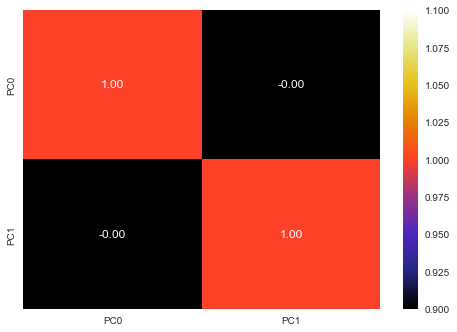

In [133]:
sns.heatmap(corr,annot=True, fmt='.2f',cmap='CMRmap',vmin=1,vmax=1)


## Model Building

In [134]:
df_new.head()

,Endorsement,Location_RTA,Policy_Code,Class_Code,Zone_Code,CC_PCC_GVW_Code,Colour_Vehicle,Permit_Code,Nature_Goods_Code,Road_Type_Code,Vehicle_Driven_By_Code,Driver_Exp_Code,Claims_History_Code,Driver_Qualification_Code,Incurred_Claims_Code,Place_Accident,TAC_NOL_Code,_AntiTheft,sc_Veh_Age,sc_IDV,sc_Stat_Cover,sc_OD_Loss,sc_DRV_CLM_AMT,sc_No_Claim_Bonus,sc_Net_OD_Premium,en_Policy_Year,en_Claim_Year
0,0,0.00180,2,11,36,50,0.86181,1,2,3,1,6,4,2,2,0.00351,59,0,1.454822,-0.679118,-0.119571,-0.268421,-2.496671,-0.599224,0.235886,14,15
1,0,0.00261,2,11,36,50,0.86181,1,2,3,1,6,2,1,5,0.00122,59,0,1.454822,-0.814440,-0.119571,-0.268421,-2.496671,-0.599224,0.160604,14,15
2,0,0.00713,2,14,36,47,0.86181,1,2,3,1,1,5,2,2,0.00624,59,0,0.361945,-1.653832,-0.119571,-0.268421,-0.938658,-0.599224,-1.513020,14,15
3,0,0.00586,2,14,35,47,0.86181,1,2,3,1,1,6,2,8,0.00305,59,0,0.707797,-1.650082,-0.119571,-0.268421,-0.517881,-0.599224,-1.432140,13,15
4,0,0.00513,2,11,36,50,0.86181,1,2,3,1,6,2,4,1,0.00403,59,0,0.961089,-0.416020,-0.119571,-0.268421,-2.496671,-0.599224,-0.290563,13,15


In [135]:
df_new.drop(['sc_IDV','Policy_Code','_AntiTheft'],axis=1,inplace=True)



In [137]:
x = df_new # independent variables
y = df['DRV_CLAIM_STATUS'] # dependent variables

In [138]:
y.value_counts(normalize=True)


0    0.948457
1    0.051543
Name: DRV_CLAIM_STATUS, dtype: float64

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=123)


In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import *
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


**Using Logit**

In [141]:
import statsmodels.formula.api as SM

In [142]:
ovl_ds = [x, y]


In [143]:
df_ovlds = pd.concat(ovl_ds,axis=1,join='inner')
df_ovlds.reset_index(drop=True,inplace=True)
df_ovlds.head()


,Endorsement,Location_RTA,Class_Code,Zone_Code,CC_PCC_GVW_Code,Colour_Vehicle,Permit_Code,Nature_Goods_Code,Road_Type_Code,Vehicle_Driven_By_Code,Driver_Exp_Code,Claims_History_Code,Driver_Qualification_Code,Incurred_Claims_Code,Place_Accident,TAC_NOL_Code,sc_Veh_Age,sc_Stat_Cover,sc_OD_Loss,sc_DRV_CLM_AMT,sc_No_Claim_Bonus,sc_Net_OD_Premium,en_Policy_Year,en_Claim_Year,DRV_CLAIM_STATUS
0,0,0.00180,11,36,50,0.86181,1,2,3,1,6,4,2,2,0.00351,59,1.454822,-0.119571,-0.268421,-2.496671,-0.599224,0.235886,14,15,1
1,0,0.00261,11,36,50,0.86181,1,2,3,1,6,2,1,5,0.00122,59,1.454822,-0.119571,-0.268421,-2.496671,-0.599224,0.160604,14,15,1
2,0,0.00713,14,36,47,0.86181,1,2,3,1,1,5,2,2,0.00624,59,0.361945,-0.119571,-0.268421,-0.938658,-0.599224,-1.513020,14,15,0
3,0,0.00586,14,35,47,0.86181,1,2,3,1,1,6,2,8,0.00305,59,0.707797,-0.119571,-0.268421,-0.517881,-0.599224,-1.432140,13,15,0
4,0,0.00513,11,36,50,0.86181,1,2,3,1,6,2,4,1,0.00403,59,0.961089,-0.119571,-0.268421,-2.496671,-0.599224,-0.290563,13,15,1


In [144]:
f_4 = 'DRV_CLAIM_STATUS~ Zone_Code+en_Claim_Year+sc_Veh_Age+Vehicle_Driven_By_Code+Location_RTA+Endorsement+Class_Code+Colour_Vehicle+CC_PCC_GVW_Code+Permit_Code+Road_Type_Code+Nature_Goods_Code+Driver_Exp_Code+Claims_History_Code+Driver_Qualification_Code+Incurred_Claims_Code+Place_Accident+TAC_NOL_Code+sc_Stat_Cover+sc_OD_Loss+sc_No_Claim_Bonus+sc_Net_OD_Premium+en_Policy_Year'
model_logit = SM.logit(formula=f_4,data=df_ovlds).fit()
model_logit.summary()


Optimization terminated successfully.
         Current function value: 0.173626
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       DRV_CLAIM_STATUS   No. Observations:                75200
Model:                          Logit   Df Residuals:                    75176
Method:                           MLE   Df Model:                           23
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                  0.1448
Time:                        13:15:14   Log-Likelihood:                -13057.
converged:                       True   LL-Null:                       -15268.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -3.6307      0.900     -4.032      0.000      -5.396      -1.866
Zone_Code                    -0.1359      0.022     -6.263      0.000      -0.178      -0.093
en_Claim_Year                -0.0374      0.031     -1.195      0.232      -0.099       0.024
sc_Veh_Age                    0.0317      0.019      1.640      0.101      -0.006       0.070
Vehicle_Driven_By_Code        0.0767      0.043      1.771      0.077      -0.008       0.162
Location_RTA                 -5.6890      0.968     -5.879      0.000      -7.586      -3.792
Endorsement                  -0.6819      0.046    -14.701      0.000      -0.773      -0.591
Class_Code                    0.0498      0.009      5.785      0.000       0.033       0.067
Colour_Vehicle                2.1186      0.136     15.542      0.000       1.851       2.386
CC_PCC_GVW_Code               0.0204      0.008      2.471      0.013       0.004       0.037
Permit_Code                   0.1436      0.018      8.116      0.000       0.109       0.178
Road_Type_Code               -0.3066      0.021    -14.825      0.000      -0.347      -0.266
Nature_Goods_Code             1.6288      0.088     18.483      0.000       1.456       1.801
Driver_Exp_Code               0.0755      0.010      7.949      0.000       0.057       0.094
Claims_History_Code           0.0023      0.016      0.146      0.884      -0.028       0.033
Driver_Qualification_Code     0.1584      0.017      9.209      0.000       0.125       0.192
Incurred_Claims_Code          0.0973      0.007     13.649      0.000       0.083       0.111
Place_Accident                0.7034      0.310      2.272      0.023       0.096       1.310
TAC_NOL_Code                  0.0240      0.001     27.654      0.000       0.022       0.026
sc_Stat_Cover                -0.1434      0.054     -2.672      0.008      -0.249      -0.038
sc_OD_Loss                   -0.2375      0.025     -9.548      0.000      -0.286      -0.189
sc_No_Claim_Bonus             0.1120      0.025      4.398      0.000       0.062       0.162
sc_Net_OD_Premium             0.0642      0.025      2.552      0.011       0.015       0.114
en_Policy_Year               -0.0626      0.028     -2.205      0.027      -0.118      -0.007
=============================================================================================
"""

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df_ovlds.values,i) for i in range(df_ovlds.shape[1])]
vif['features']= df_ovlds.columns
vif.head(40)


,VIF,features
0,1.939576,Endorsement
1,1.000538,Location_RTA
2,35.926845,Class_Code
3,659.292263,Zone_Code
4,519.361079,CC_PCC_GVW_Code
5,9.105203,Colour_Vehicle
6,4.778461,Permit_Code
7,43.902239,Nature_Goods_Code
8,23.556069,Road_Type_Code
9,20.390845,Vehicle_Driven_By_Code


**Dropping of Insignificant columns**

In [146]:
x_train.drop(['Vehicle_Driven_By_Code','sc_Veh_Age','en_Claim_Year','Claims_History_Code','Place_Accident'],axis=1,inplace=True)


In [147]:
x_test.drop(['Vehicle_Driven_By_Code','sc_Veh_Age','en_Claim_Year','Claims_History_Code','Place_Accident'],axis=1,inplace=True)


**Logistic Regression using SKlearn**

In [148]:
logr= LogisticRegression()
mod1= logr.fit(x_train,y_train)


In [149]:
y_pred = mod1.predict(x_test)

In [150]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14256
           1       1.00      1.00      1.00       784

    accuracy                           1.00     15040
   macro avg       1.00      1.00      1.00     15040
weighted avg       1.00      1.00      1.00     15040



**Decision Tree**

In [152]:
DT= DecisionTreeClassifier()
mod2= DT.fit(x_train,y_train)


In [155]:
y_pred_train = mod2.predict(x_train)

In [157]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57071
           1       1.00      1.00      1.00      3089

    accuracy                           1.00     60160
   macro avg       1.00      1.00      1.00     60160
weighted avg       1.00      1.00      1.00     60160



In [158]:
y_pred_test = mod2.predict(x_test)

In [159]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14253
           1       1.00      1.00      1.00       787

    accuracy                           1.00     15040
   macro avg       1.00      1.00      1.00     15040
weighted avg       1.00      1.00      1.00     15040



**KNeighbours Classifier**

In [160]:
KNN= KNeighborsClassifier()
mod3= KNN.fit(x_train,y_train)


In [161]:
y_pred_train = mod3.predict(x_train)

In [162]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57300
           1       0.92      0.99      0.95      2860

    accuracy                           1.00     60160
   macro avg       0.96      0.99      0.98     60160
weighted avg       1.00      1.00      1.00     60160



In [163]:
y_pred_test = mod3.predict(x_test)

In [164]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14342
           1       0.87      0.98      0.92       698

    accuracy                           0.99     15040
   macro avg       0.93      0.99      0.96     15040
weighted avg       0.99      0.99      0.99     15040



**Linear Discriminant Analysis-LDA**

In [165]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [166]:
lda =LDA()
mod4= lda.fit(x_train,y_train)


In [167]:
y_pred_train= mod4.predict(x_train)


In [168]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     56697
           1       0.99      0.88      0.93      3463

    accuracy                           0.99     60160
   macro avg       0.99      0.94      0.97     60160
weighted avg       0.99      0.99      0.99     60160



In [169]:
y_pred_test = mod4.predict(x_test)

In [170]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14153
           1       0.99      0.88      0.93       887

    accuracy                           0.99     15040
   macro avg       0.99      0.94      0.97     15040
weighted avg       0.99      0.99      0.99     15040



**Random Forest**

In [171]:
rf= RandomForestClassifier(n_estimators=100)
mod5= rf.fit(x_train,y_train)


In [172]:
y_pred_test= mod5.predict(x_test)


In [173]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14253
           1       1.00      1.00      1.00       787

    accuracy                           1.00     15040
   macro avg       1.00      1.00      1.00     15040
weighted avg       1.00      1.00      1.00     15040



**Gradient Boosting**

In [174]:
gb = GradientBoostingClassifier(n_estimators=100)
mod6= rf.fit(x_train,y_train)


In [175]:
y_pred_test= mod6.predict(x_test)


In [176]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14253
           1       1.00      1.00      1.00       787

    accuracy                           1.00     15040
   macro avg       1.00      1.00      1.00     15040
weighted avg       1.00      1.00      1.00     15040



**Hyperparameter Tuning**

**Logistic Regression**

In [ ]:
# # we now fine tune the models.....

# param_grid = {
#     'solver': ['lbfgs', 'liblinear', 'newton-cg'],
#     'max_iter': [1000, 10000], 
#     'penalty': ['none'], 
#   #  'Verbose': [True],
#     'n_jobs': [2]
# }

# lr=LogisticRegression(random_state=123)

# grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 3)


# grid_search.fit(x_train,y_train)

# print(grid_search.best_params_)


**Decision Tree**

In [ ]:
# # we now fine tune the models.....

# param_grid = {
#     'max_depth': [10,15,20], # 3,5,7,9
#     'min_samples_leaf': [3, 15,30], # this is 1-3 % of train data
#     'min_samples_split': [15,30,35], # 3 times the min sample leaf
# }

# DT=DecisionTreeClassifier(random_state=123)

# grid_search = GridSearchCV(estimator = DT, param_grid = param_grid, cv = 3)


# grid_search.fit(x_train,y_train)

# print(grid_search.best_params_)


**KNeighbours**

In [ ]:
# param_grid = {
#     'n_neighbors': [3,5,7],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
#     'p': [2], 
#     'n_jobs': [2]
# }

# knn=KNeighborsClassifier()
# param_grid = {
#     'solver': ['svd', 'lsqr', 'eigen']
    
# }

# lda=LDA()

# grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 3)


# grid_search.fit(x_train,y_train)

# print(grid_search.best_params_)


**LDA**

In [ ]:
# param_grid = {
#     'solver': ['svd', 'lsqr', 'eigen']
    
# }

# lda=LDA()

# grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 3)


# grid_search.fit(x_train,y_train)

# print(grid_search.best_params_)


**Random Forest**

In [ ]:
# param_grid = {
#     'max_depth': [10,15,20], #  3,5,7,9
#     'max_features': [6], # take the sqrt of the number of features
#     'min_samples_leaf': [3, 15,30],  # 1-3% of data
#     'min_samples_split': [15,30,35], # 3 times of min_Sample_leaf
#     'n_estimators': [150,200] 
# } 

# rfcl = RandomForestClassifier(random_state=123)

# grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)
# grid_search.fit(x_train,y_train)
# print(grid_search.best_params_)


**Gradient Boosting Classifier**

In [ ]:
# param_grid = {
#     'loss': ['log_loss', 'deviance', 'exponential'],
#     'learning_rate': [0.1, 0.01], 
#     'n_estimators': [150,200], 
#     'min_samples_split': [15,30],
#     'max_depth': [10,15],
#     'max_features':['auto', 'sqrt', 'log2'],
#     'tol':[0.01]

# }

# gbc=GradientBoostingClassifier()

# grid_search = GridSearchCV(estimator = gbc, param_grid = param_grid, cv = 3)


# grid_search.fit(x_train,y_train)

# print(grid_search.best_params_)


**Performance of the model with Hyperparameters**

**Logistic Regression**

In [177]:
logr_hyp= LogisticRegression(max_iter= 1000, n_jobs= 2, penalty= 'none', solver= 'lbfgs')
mod1= logr_hyp.fit(x_train,y_train)


In [178]:
y_pred = mod1.predict(x_test)

In [179]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14253
           1       1.00      1.00      1.00       787

    accuracy                           1.00     15040
   macro avg       1.00      1.00      1.00     15040
weighted avg       1.00      1.00      1.00     15040



**Decision Tree**

In [180]:
dt_hyp = DecisionTreeClassifier(max_depth = 10, min_samples_leaf= 3, min_samples_split = 15)
mod2= dt_hyp.fit(x_train,y_train)


In [181]:
y_pred = mod2.predict(x_test)

In [182]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14253
           1       1.00      1.00      1.00       787

    accuracy                           1.00     15040
   macro avg       1.00      1.00      1.00     15040
weighted avg       1.00      1.00      1.00     15040



**LDA**

In [183]:
lda_hyp=LDA(solver= 'svd')
mod3= lda_hyp.fit(x_train,y_train)


In [184]:
y_pred = mod3.predict(x_test)

In [185]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14153
           1       0.99      0.88      0.93       887

    accuracy                           0.99     15040
   macro avg       0.99      0.94      0.97     15040
weighted avg       0.99      0.99      0.99     15040



**KNeighbours**

In [186]:
knn_hyp =KNeighborsClassifier(algorithm = 'auto', n_jobs = 2, n_neighbors = 3, p = 2)
mod4= knn_hyp.fit(x_train,y_train)


In [187]:
y_pred = mod4.predict(x_test)

In [188]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14328
           1       0.89      0.98      0.93       712

    accuracy                           0.99     15040
   macro avg       0.94      0.99      0.96     15040
weighted avg       0.99      0.99      0.99     15040



**Random Forest**

In [189]:
rf_hyp = RandomForestClassifier(max_depth = 10, max_features= 6, min_samples_leaf = 3, min_samples_split = 15, n_estimators= 150)
mod5= rf_hyp.fit(x_train,y_train)


In [190]:
y_pred = mod5.predict(x_test)

In [191]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14253
           1       1.00      1.00      1.00       787

    accuracy                           1.00     15040
   macro avg       1.00      1.00      1.00     15040
weighted avg       1.00      1.00      1.00     15040



**Gradient Boosting**

In [193]:
gb_hyp = GradientBoostingClassifier(learning_rate= 0.1,loss= 'deviance', max_depth= 10, max_features= 'auto', min_samples_split = 15,
                                     n_estimators = 150, tol = 0.01)
mod6= gb_hyp.fit(x_train,y_train)


In [194]:
y_pred = mod6.predict(x_test)

In [195]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14253
           1       1.00      1.00      1.00       787

    accuracy                           1.00     15040
   macro avg       1.00      1.00      1.00     15040
weighted avg       1.00      1.00      1.00     15040



**Pipelines**

In [196]:
logr_pipeline= Pipeline([("logistic Regression", LogisticRegression())])
dt_pipeline  = Pipeline([("dt classifier", DecisionTreeClassifier())])
knn_pipeline = Pipeline([("KNN_classifier", KNeighborsClassifier())])
lda_pipeline = Pipeline([("LDA_classifier", LDA())])
rf_pipeline  = Pipeline([("KNN_classifier", RandomForestClassifier())])
gbc_pipeline = Pipeline([("KNN_classifier", GradientBoostingClassifier())])


In [197]:
pipelines = [logr_pipeline,dt_pipeline,knn_pipeline,lda_pipeline,rf_pipeline,gbc_pipeline]
pipe_dict = {0: "Logr", 1: "DT",2:"KNN",3:'lda',4 :'rf',5:'gbc'}


In [198]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(pipelines):
    score = cross_val_score(pipe, x,y, cv = 5)
    print(pipe_dict[i], ": ", score.max())


Logr :  0.9998670212765958
DT :  1.0
KNN :  0.9908909574468086
lda :  0.9939494680851064
rf :  1.0
gbc :  1.0
